<a href="https://colab.research.google.com/github/genarioazevedoufape/atividades_pet_data_science/blob/main/Sauter_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta

from google.colab import drive

from statsmodels.graphics.tsaplots import plot_acf

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

## Importação dos Dados

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/PET DATA SCIENCE - 2024/M5_full.parquet'

In [ ]:
df = pd.read_parquet(path)

In [ ]:
df

id        item_id    dept_id   cat_id  \
0         HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1         HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2         HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3         HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4         HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                                 ...            ...        ...      ...   
59181085    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
59181086    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
59181087    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
59181088    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
59181089    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

         store_id state_id  value        date  
0            CA_1       CA      0  2011-01-29  
1            CA_1       CA      0  2011-01-29  
2            CA_1       CA      0  2011-01-29  
3            CA_1       CA      0  2011-01-29  
4            CA_1       CA      0  2011-01-29  
...           ...      ...    ...         ...  
59181085     WI_3       WI      1  2016-05-22  
59181086     WI_3       WI      0  2016-05-22  
59181087     WI_3       WI      2  2016-05-22  
59181088     WI_3       WI      0  2016-05-22  
59181089     WI_3       WI      1  2016-05-22  

[59181090 rows x 8 columns]

## Pré-processamento dos Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59181090 entries, 0 to 59181089
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   id        category
 1   item_id   category
 2   dept_id   category
 3   cat_id    category
 4   store_id  category
 5   state_id  category
 6   value     int16   
 7   date      object  
dtypes: category(6), int16(1), object(1)
memory usage: 1017.2+ MB


In [ ]:
df.isna().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
state_id    0
value       0
date        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['mes'] = df['date'].dt.month
df['ano'] = df['date'].dt.year

In [ ]:
df.set_index('date', inplace=True)

In [ ]:
# df.drop(['item_id'], axis=1, inplace=True)


In [ ]:
df

id        item_id    dept_id   cat_id  \
date                                                                           
2011-01-29  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
2011-01-29  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2011-01-29  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
2011-01-29  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
2011-01-29  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                                   ...            ...        ...      ...   
2016-05-22    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
2016-05-22    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
2016-05-22    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
2016-05-22    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
2016-05-22    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

           store_id state_id  value  mes   ano  
date                                            
2011-01-29     CA_1       CA      0    1  2011  
2011-01-29     CA_1       CA      0    1  2011  
2011-01-29     CA_1       CA      0    1  2011  
2011-01-29     CA_1       CA      0    1  2011  
2011-01-29     CA_1       CA      0    1  2011  
...             ...      ...    ...  ...   ...  
2016-05-22     WI_3       WI      1    5  2016  
2016-05-22     WI_3       WI      0    5  2016  
2016-05-22     WI_3       WI      2    5  2016  
2016-05-22     WI_3       WI      0    5  2016  
2016-05-22     WI_3       WI      1    5  2016  

[59181090 rows x 9 columns]

In [ ]:
# df.to_parquet('meu_arquivo.json')

## Estatísticas Descritivas

In [ ]:
df['value'].describe()

count    5.918109e+07
mean     1.130888e+00
std      3.870038e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      7.630000e+02
Name: value, dtype: float64

In [ ]:
df[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']].describe()

id      item_id   dept_id    cat_id  \
count                      59181090     59181090  59181090  59181090   
unique                        30490         3049         7         3   
top     FOODS_1_001_CA_1_evaluation  FOODS_1_001   FOODS_3     FOODS   
freq                           1941        19410  15974430  27892170   

        store_id  state_id  
count   59181090  59181090  
unique        10         3  
top         CA_1        CA  
freq     5918109  23672436

## Visualização de Dados

In [ ]:
dados_mensais = df.groupby(['ano', 'mes'])['value'].sum().reset_index()

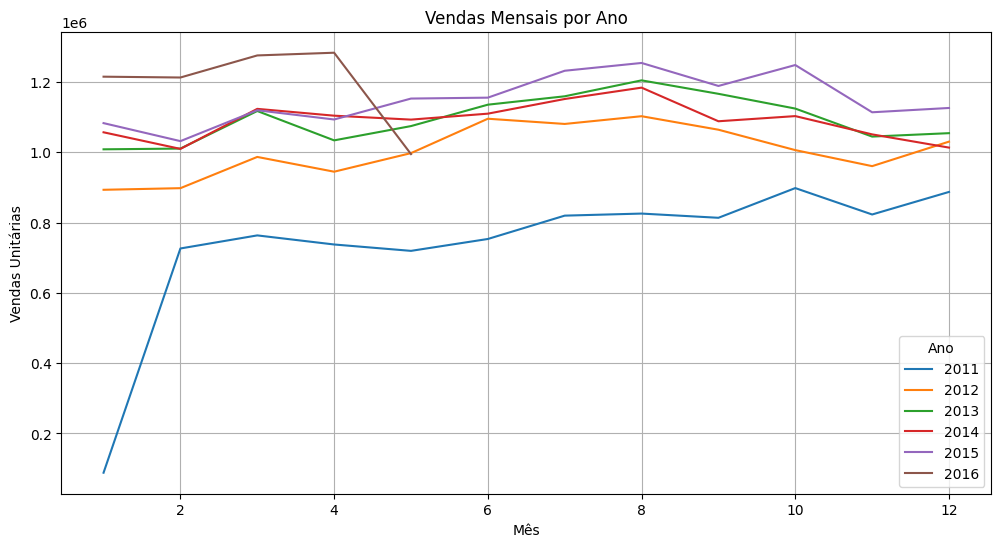

In [ ]:
plt.figure(figsize=(12, 6))
for ano in dados_mensais['ano'].unique():
    df_ano = dados_mensais[dados_mensais['ano'] == ano]
    plt.plot(df_ano['mes'], df_ano['value'], label=f'{ano}')

plt.title('Vendas Mensais por Ano')
plt.xlabel('Mês')
plt.ylabel('Vendas Unitárias')
plt.legend(title='Ano')
plt.grid(True)
plt.show()

In [ ]:
pivot_table = dados_mensais.pivot(index='mes', columns='ano', values='value')

<Figure size 1600x600 with 0 Axes>

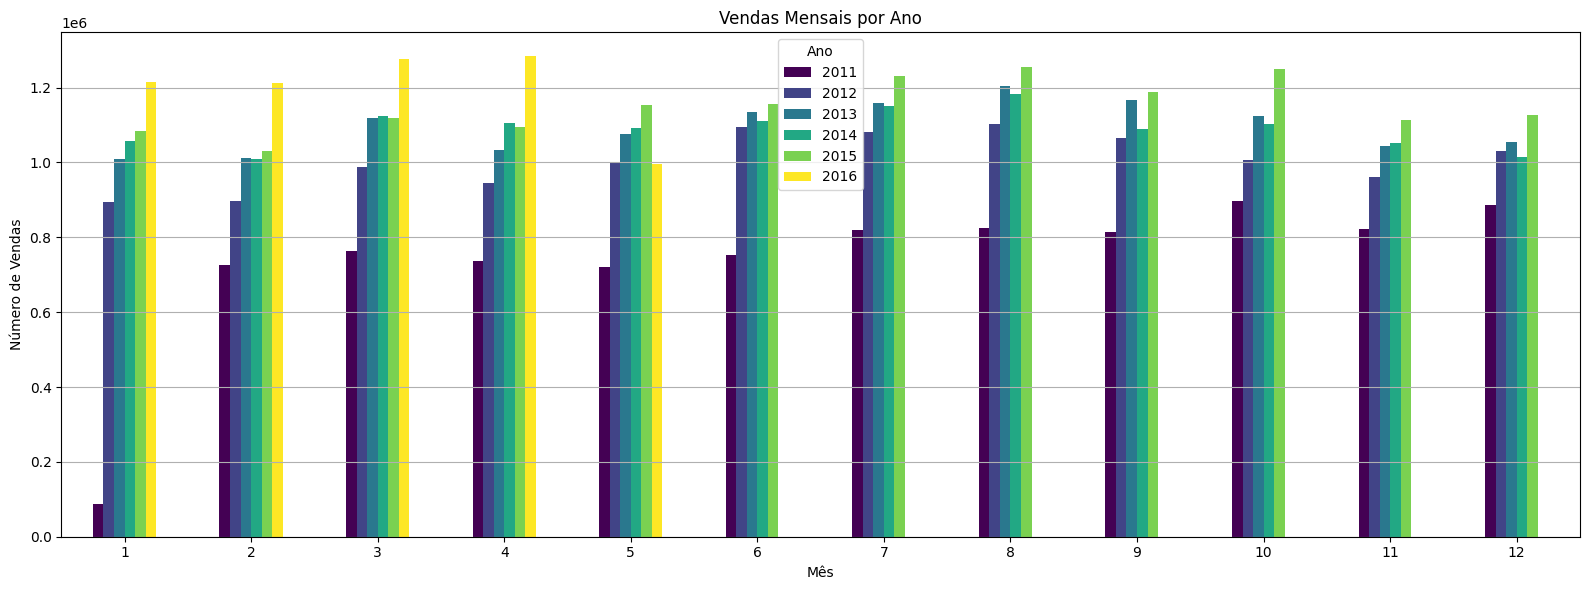

In [ ]:
plt.figure(figsize=(16, 6))
pivot_table.plot(kind='bar', figsize=(16, 6), colormap='viridis')
plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.title('Vendas Mensais por Ano')
plt.xticks(rotation=0)
plt.legend(title='Ano')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

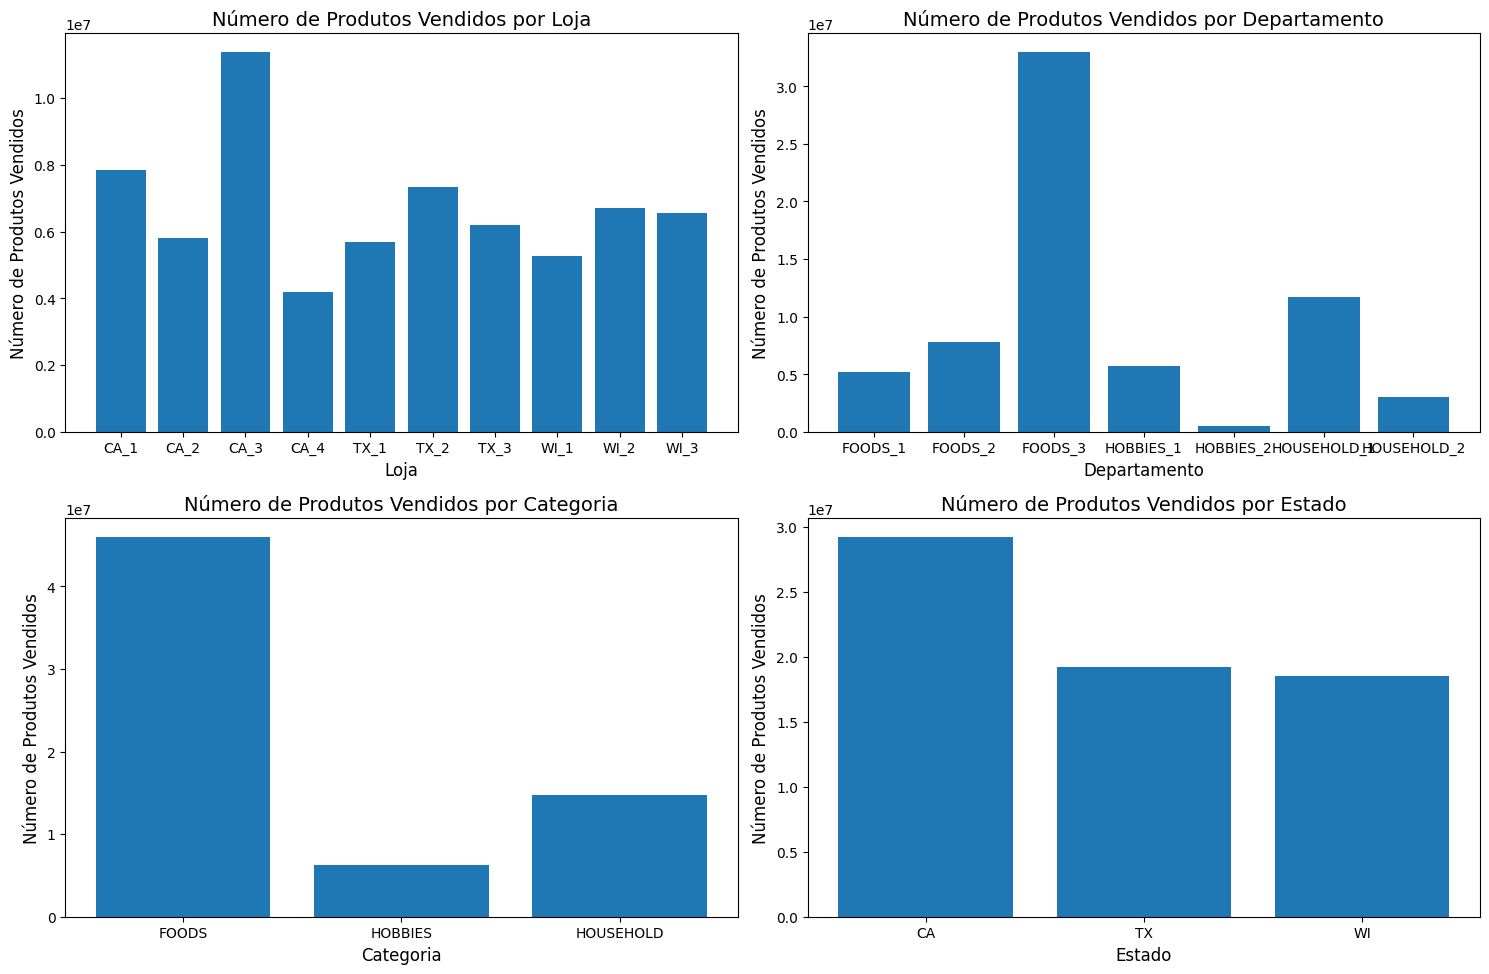

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

vendas_por_loja = df.groupby('store_id')['value'].sum()
axs[0, 0].bar(vendas_por_loja.index, vendas_por_loja.values)
axs[0, 0].set_xlabel('Loja', fontsize=12)
axs[0, 0].set_ylabel('Número de Produtos Vendidos', fontsize=12)
axs[0, 0].set_title('Número de Produtos Vendidos por Loja', fontsize=14)

vendas_por_departamento = df.groupby('dept_id')['value'].sum()
axs[0, 1].bar(vendas_por_departamento.index, vendas_por_departamento.values)
axs[0, 1].set_xlabel('Departamento', fontsize=12)
axs[0, 1].set_ylabel('Número de Produtos Vendidos', fontsize=12)
axs[0, 1].set_title('Número de Produtos Vendidos por Departamento', fontsize=14)

vendas_por_categoria = df.groupby('cat_id')['value'].sum()
axs[1, 0].bar(vendas_por_categoria.index, vendas_por_categoria.values)
axs[1, 0].set_xlabel('Categoria', fontsize=12)
axs[1, 0].set_ylabel('Número de Produtos Vendidos', fontsize=12)
axs[1, 0].set_title('Número de Produtos Vendidos por Categoria', fontsize=14)

vendas_por_estado = df.groupby('state_id')['value'].sum()
axs[1, 1].bar(vendas_por_estado.index, vendas_por_estado.values)
axs[1, 1].set_xlabel('Estado', fontsize=12)
axs[1, 1].set_ylabel('Número de Produtos Vendidos', fontsize=12)
axs[1, 1].set_title('Número de Produtos Vendidos por Estado', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
dados_loja_CA_3 = df[df['store_id'] == 'CA_3']
dados_agrupados = dados_loja_CA_3.groupby('id')['value'].sum()
itens_mais_vendidos = dados_agrupados.sort_values(ascending=False).head(10)
itens_menos_vendidos = dados_agrupados.sort_values(ascending=True).head(10)

In [ ]:
itens_mais_vendidos

id
FOODS_3_090_CA_3_evaluation    253859
FOODS_3_586_CA_3_evaluation    136269
FOODS_3_120_CA_3_evaluation     90412
FOODS_3_252_CA_3_evaluation     82861
FOODS_3_541_CA_3_evaluation     80495
FOODS_3_635_CA_3_evaluation     80252
FOODS_3_808_CA_3_evaluation     72597
FOODS_3_587_CA_3_evaluation     71200
FOODS_3_555_CA_3_evaluation     59999
FOODS_3_681_CA_3_evaluation     56790
Name: value, dtype: int64

In [ ]:
dados_agrupados = df.groupby('item_id')['value'].sum().sort_values(ascending=False)
itens_mais_vendidos = dados_agrupados.head(100)

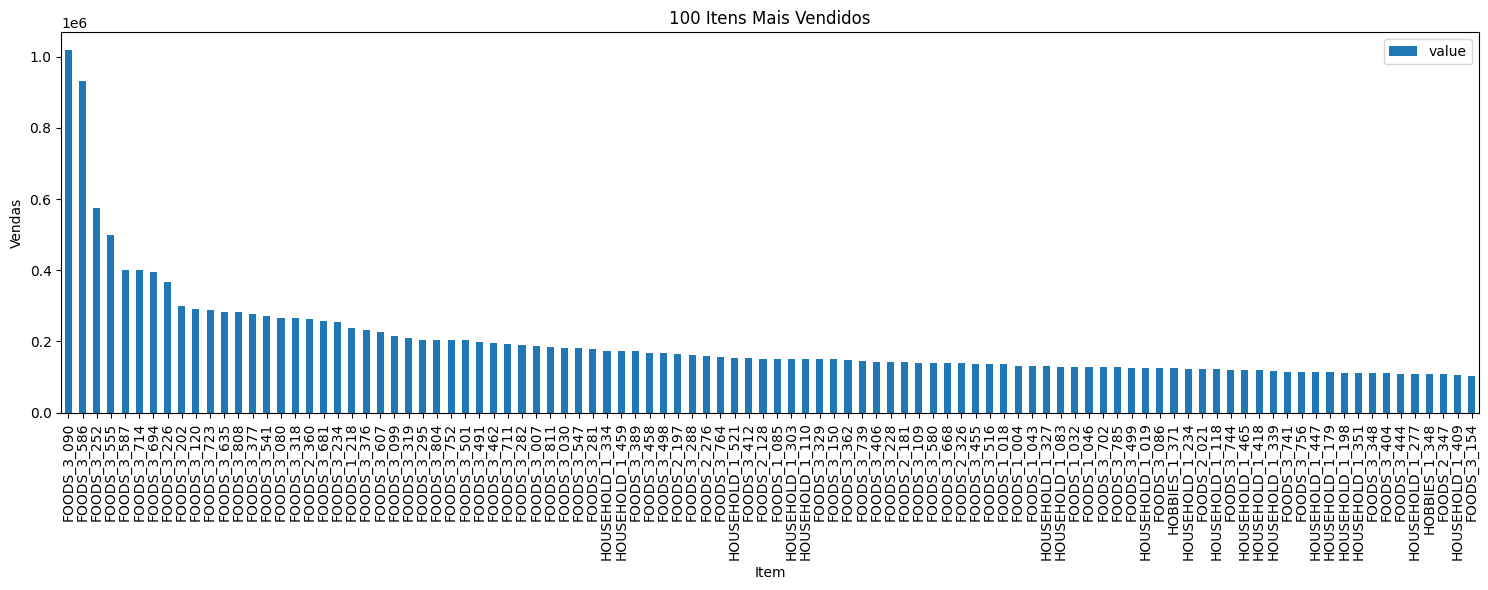

In [ ]:
plt.figure(figsize=(15, 6))
itens_mais_vendidos.plot(kind='bar')
plt.title('100 Itens Mais Vendidos')
plt.xlabel('Item')
plt.ylabel('Vendas')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
venda_top_100 = itens_mais_vendidos.sum()
venda_total = df['value'].sum()
porcentagem = (venda_top_100 / venda_total) * 100

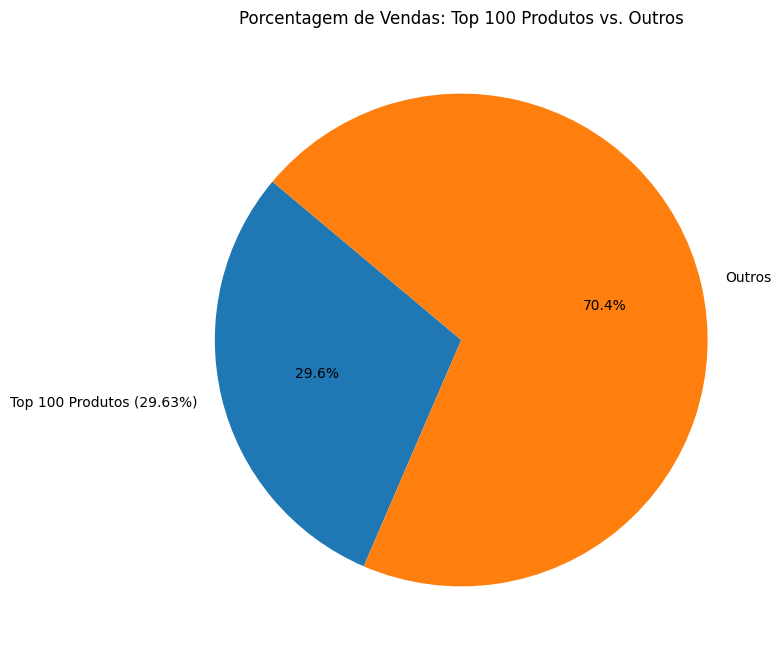

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie([porcentagem, 100 - porcentagem], labels=[f'Top 100 Produtos ({porcentagem:.2f}%)', 'Outros'], autopct='%1.1f%%', startangle=140)
plt.title('Porcentagem de Vendas: Top 100 Produtos vs. Outros')
plt.show()

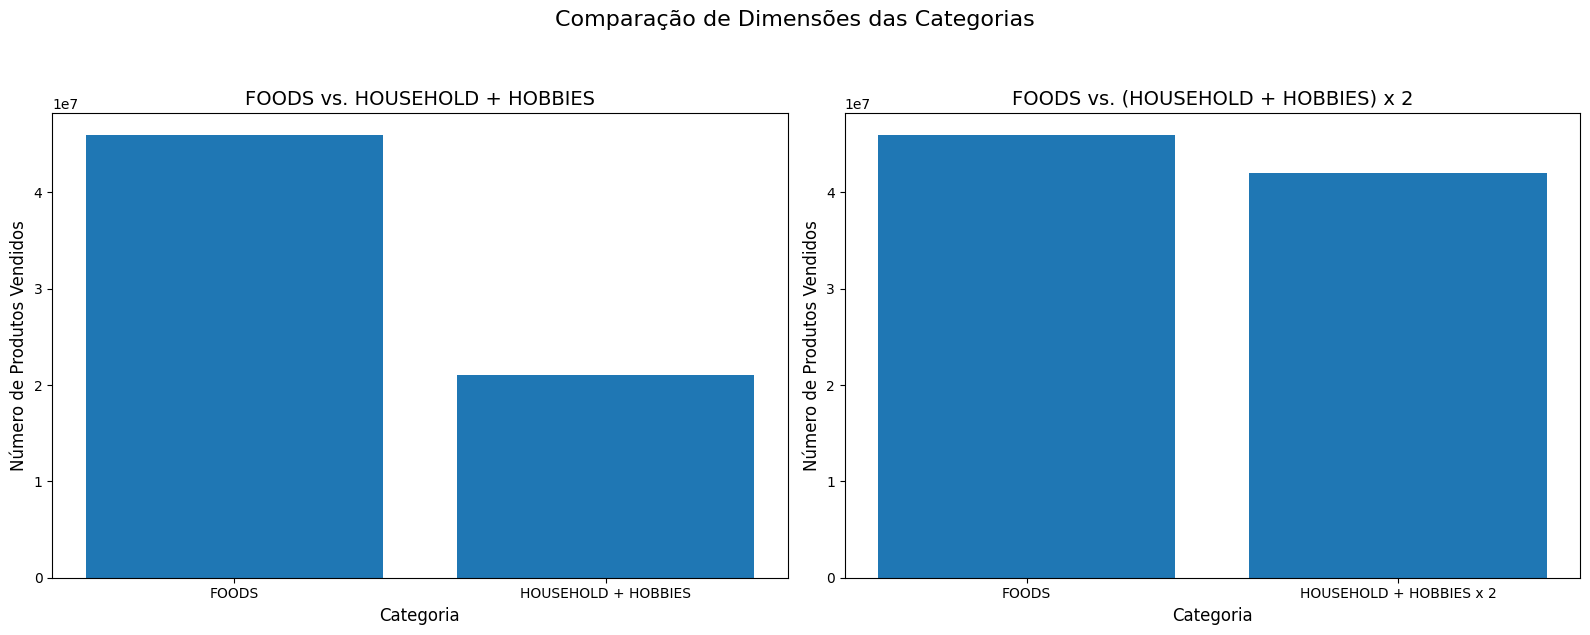

In [ ]:
# Calcular as vendas de 'FOODS'
vendas_foods = df[df['cat_id'] == 'FOODS']['value'].sum()

# Calcular as vendas de 'HOUSEHOLD' e 'HOBBIES'
vendas_household = df[df['cat_id'] == 'HOUSEHOLD']['value'].sum()
vendas_hobbies = df[df['cat_id'] == 'HOBBIES']['value'].sum()

# Somar as vendas de 'HOUSEHOLD' e 'HOBBIES'
vendas_cat_and_household = vendas_household + vendas_hobbies

# Multiplicar a soma das vendas por 2
vendas_cat_and_household_x2 = vendas_cat_and_household * 2

# Preparar os dados para os gráficos
categorias_soma = ['FOODS', 'HOUSEHOLD + HOBBIES']
vendas_soma = [vendas_foods, vendas_cat_and_household]

categorias_multiplicadas = ['FOODS', 'HOUSEHOLD + HOBBIES x 2']
vendas_multiplicadas = [vendas_foods, vendas_cat_and_household_x2]

# Configurar os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))  # 1 linha e 2 colunas para os subplots

# Primeiro gráfico
axes[0].bar(categorias_soma, vendas_soma)
axes[0].set_xlabel('Categoria', fontsize=12)
axes[0].set_ylabel('Número de Produtos Vendidos', fontsize=12)
axes[0].set_title('FOODS vs. HOUSEHOLD + HOBBIES', fontsize=14)

# Segundo gráfico
axes[1].bar(categorias_multiplicadas, vendas_multiplicadas)
axes[1].set_xlabel('Categoria', fontsize=12)
axes[1].set_ylabel('Número de Produtos Vendidos', fontsize=12)
axes[1].set_title('FOODS vs. (HOUSEHOLD + HOBBIES) x 2', fontsize=14)

# Título geral para os subplots
fig.suptitle('Comparação de Dimensões das Categorias', fontsize=16, y=1.05)

# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

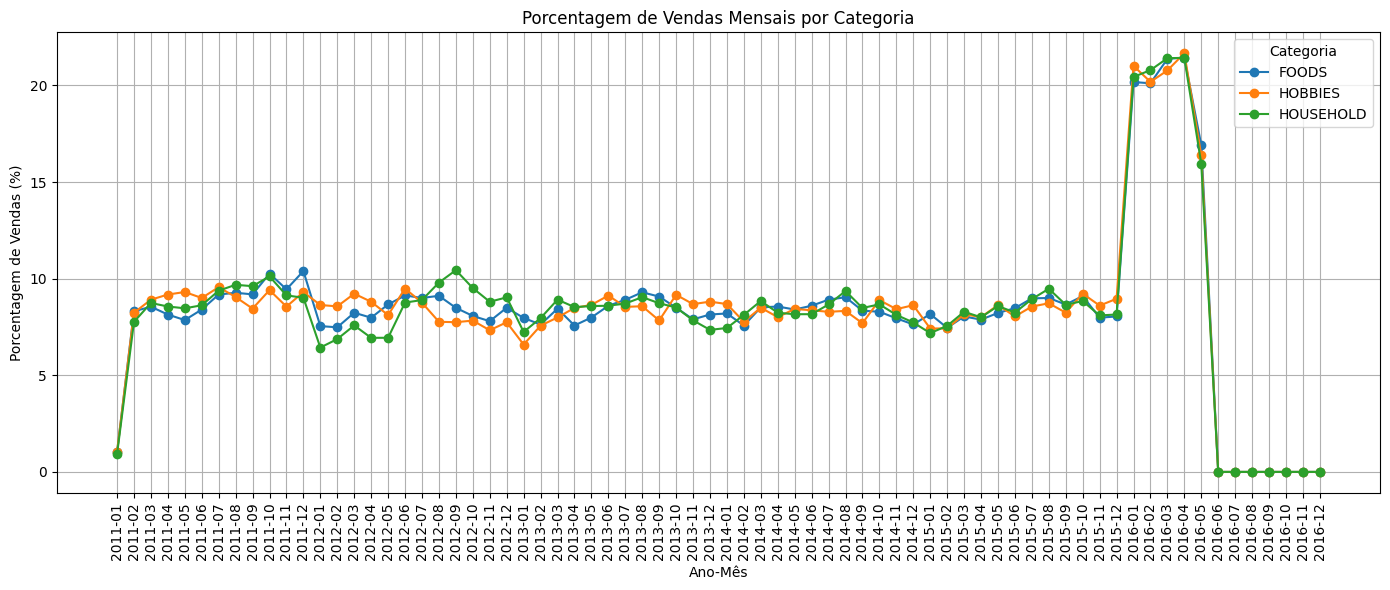

In [ ]:
df_mensal = df.groupby(['cat_id', 'ano', 'mes'])['value'].sum().reset_index()
df_mensal['ano_mes'] = df_mensal['ano'].astype(str) + '-' + df_mensal['mes'].astype(str).str.zfill(2)

# Calculando o total de vendas mensais por categoria
df_mensal['total_mes'] = df_mensal.groupby(['cat_id', 'ano'])['value'].transform('sum')

# Calculando a porcentagem de vendas mensais por categoria
df_mensal['percentagem'] = (df_mensal['value'] / df_mensal['total_mes']) * 100

# Plotando os dados
plt.figure(figsize=(14, 6))

categories = df_mensal['cat_id'].unique()
for category in categories:
    category_data = df_mensal[df_mensal['cat_id'] == category]
    plt.plot(category_data['ano_mes'], category_data['percentagem'], marker='o', label=category)

plt.xticks(rotation=90)
plt.xlabel('Ano-Mês')
plt.ylabel('Porcentagem de Vendas (%)')
plt.title('Porcentagem de Vendas Mensais por Categoria')
plt.legend(title='Categoria')
plt.grid(True)
plt.tight_layout()
plt.show()

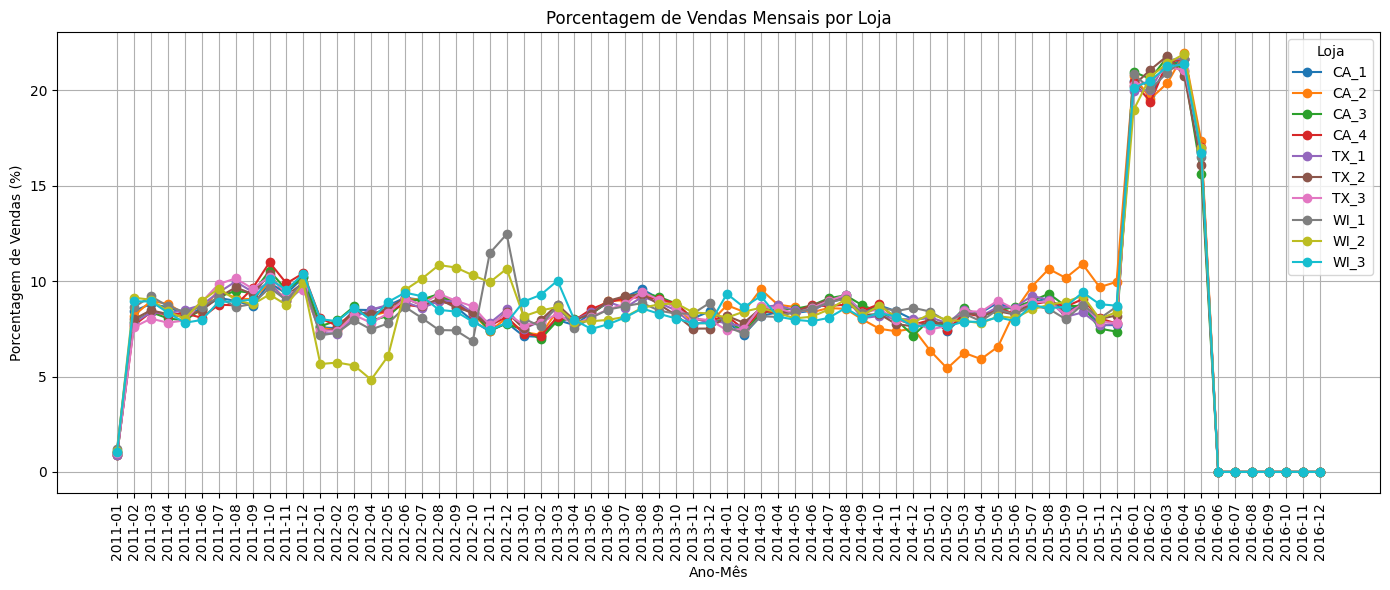

In [ ]:
df_mensal = df.groupby(['store_id', 'ano', 'mes'])['value'].sum().reset_index()
df_mensal['ano_mes'] = df_mensal['ano'].astype(str) + '-' + df_mensal['mes'].astype(str).str.zfill(2)

df_mensal['total_mes'] = df_mensal.groupby(['store_id', 'ano'])['value'].transform('sum')

df_mensal['percentagem'] = (df_mensal['value'] / df_mensal['total_mes']) * 100

plt.figure(figsize=(14, 6))

stores = df_mensal['store_id'].unique()
for store in stores:
    store_data = df_mensal[df_mensal['store_id'] == store]
    plt.plot(store_data['ano_mes'], store_data['percentagem'], marker='o', label=store)

plt.xticks(rotation=90)
plt.xlabel('Ano-Mês')
plt.ylabel('Porcentagem de Vendas (%)')
plt.title('Porcentagem de Vendas Mensais por Loja')
plt.legend(title='Loja')
plt.grid(True)
plt.tight_layout()
plt.show()

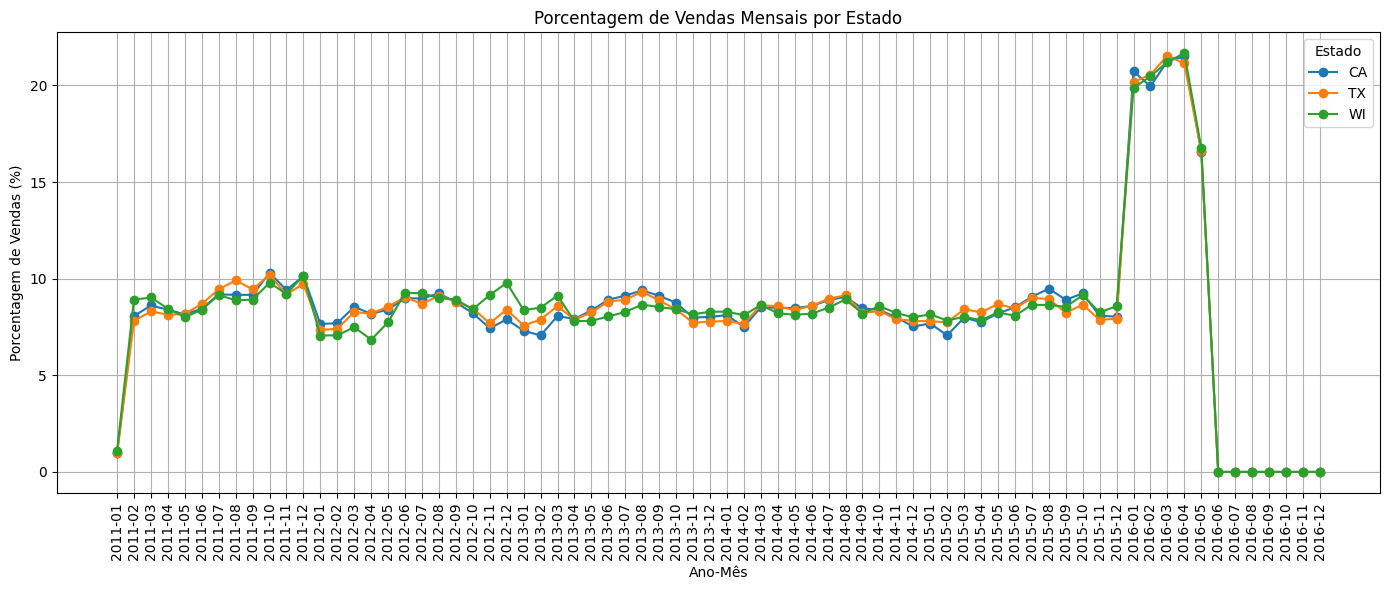

In [ ]:
df_mensal = df.groupby(['state_id', 'ano', 'mes'])['value'].sum().reset_index()
df_mensal['ano_mes'] = df_mensal['ano'].astype(str) + '-' + df_mensal['mes'].astype(str).str.zfill(2)

df_mensal['total_mes'] = df_mensal.groupby(['state_id', 'ano'])['value'].transform('sum')

df_mensal['percentagem'] = (df_mensal['value'] / df_mensal['total_mes']) * 100

plt.figure(figsize=(14, 6))

states = df_mensal['state_id'].unique()
for state in states:
    state_data = df_mensal[df_mensal['state_id'] == state]
    plt.plot(state_data['ano_mes'], state_data['percentagem'], marker='o', label=state)

plt.xticks(rotation=90)
plt.xlabel('Ano-Mês')
plt.ylabel('Porcentagem de Vendas (%)')
plt.title('Porcentagem de Vendas Mensais por Estado')
plt.legend(title='Estado')
plt.grid(True)
plt.tight_layout()
plt.show()

## Identificação de Outliers

In [ ]:
# Q1 (25º percentil) e Q3 (75º percentil)
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)

# IQR (Interquartile Range)
IQR = Q3 - Q1

# limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar os outliers
outliers = df[(df['value'] < limite_inferior) | (df['value'] > limite_superior)]

In [ ]:
print(f"Outliers encontrados: {len(outliers)}")
print(outliers)


Outliers encontrados: 7037502
                                       id        item_id    dept_id   cat_id  \
date                                                                           
2011-01-29  HOBBIES_1_008_CA_1_evaluation  HOBBIES_1_008  HOBBIES_1  HOBBIES   
2011-01-29  HOBBIES_1_015_CA_1_evaluation  HOBBIES_1_015  HOBBIES_1  HOBBIES   
2011-01-29  HOBBIES_1_016_CA_1_evaluation  HOBBIES_1_016  HOBBIES_1  HOBBIES   
2011-01-29  HOBBIES_1_032_CA_1_evaluation  HOBBIES_1_032  HOBBIES_1  HOBBIES   
2011-01-29  HOBBIES_1_044_CA_1_evaluation  HOBBIES_1_044  HOBBIES_1  HOBBIES   
...                                   ...            ...        ...      ...   
2016-05-22    FOODS_3_804_WI_3_evaluation    FOODS_3_804    FOODS_3    FOODS   
2016-05-22    FOODS_3_811_WI_3_evaluation    FOODS_3_811    FOODS_3    FOODS   
2016-05-22    FOODS_3_812_WI_3_evaluation    FOODS_3_812    FOODS_3    FOODS   
2016-05-22    FOODS_3_821_WI_3_evaluation    FOODS_3_821    FOODS_3    FOODS   
2016-05-22

In [ ]:
# sns.set(style="whitegrid")
# plt.figure(figsize=(14, 8))
# sns.boxplot(x=df['value'])
# plt.title('Boxplot das Vendas (Value) com Outliers')
# plt.xlabel('Vendas (Value)')
# plt.show()

In [ ]:
# Transformar os Outliers: Substituir os valores atípicos por limites inferiores ou superiores.
df['value'] = df['value'].apply(lambda x: limite_inferior if x < limite_inferior else limite_superior if x > limite_superior else x)

###Média Movel

In [ ]:
media_mensal = df['value'].resample('M').mean()
media_movel_mensal = media_mensal.rolling(window=3).mean()

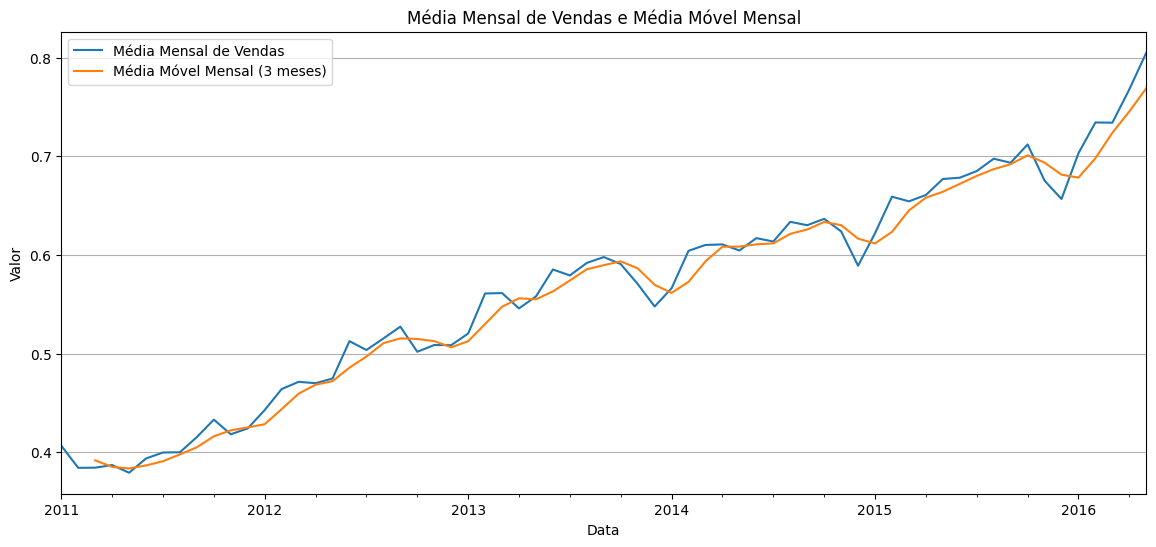

In [ ]:
plt.figure(figsize=(14, 6))
media_mensal.plot(label='Média Mensal de Vendas')
media_movel_mensal.plot(label='Média Móvel Mensal (3 meses)', style='-')
plt.title('Média Mensal de Vendas e Média Móvel Mensal')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(axis='y')
plt.show()

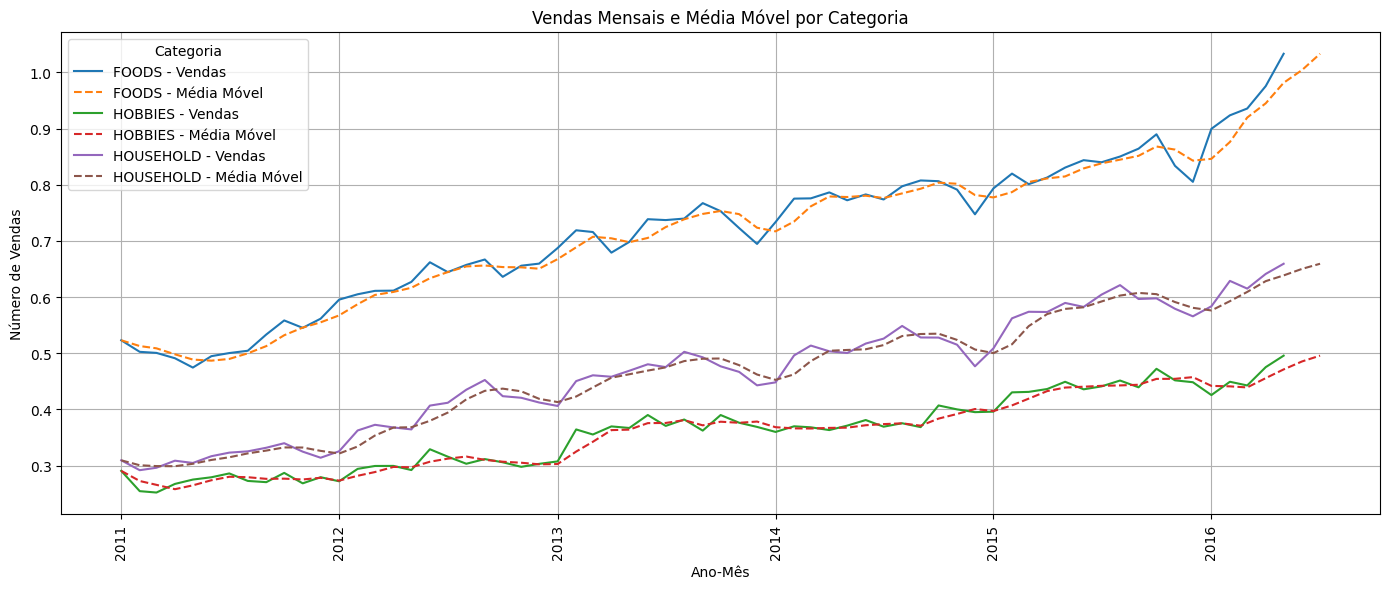

In [ ]:
# Agrupando e calculando a média das vendas mensais por categoria, ano e mês
df_mensal = df.groupby(['cat_id', 'ano', 'mes'])['value'].mean().reset_index()
df_mensal['ano_mes'] = pd.to_datetime(df_mensal['ano'].astype(str) + '-' + df_mensal['mes'].astype(str).str.zfill(2))
df_mensal = df_mensal.sort_values('ano_mes')

# Calculando a média móvel usando rolling window de 3 meses
df_mensal['media_movel'] = df_mensal.groupby('cat_id')['value'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

plt.figure(figsize=(14, 6))
categories = df_mensal['cat_id'].unique()
for category in categories:
    category_data = df_mensal[df_mensal['cat_id'] == category]
    plt.plot(category_data['ano_mes'], category_data['value'], label=f'{category} - Vendas')
    plt.plot(category_data['ano_mes'], category_data['media_movel'], linestyle='--', label=f'{category} - Média Móvel')

plt.xticks(rotation=90)
plt.xlabel('Ano-Mês')
plt.ylabel('Número de Vendas')
plt.title('Vendas Mensais e Média Móvel por Categoria')
plt.legend(title='Categoria')
plt.grid(True)
plt.tight_layout()
plt.show()

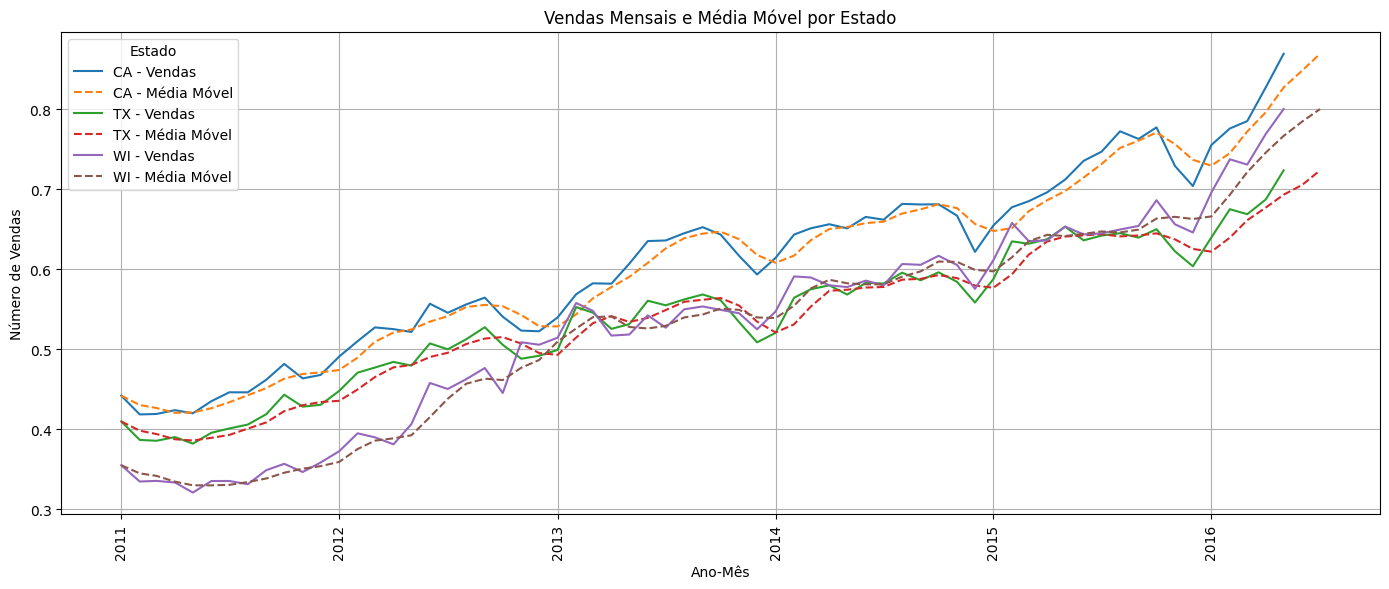

In [ ]:
df_mensal = df.groupby(['state_id', 'ano', 'mes'])['value'].mean().reset_index()
df_mensal['ano_mes'] = pd.to_datetime(df_mensal['ano'].astype(str) + '-' + df_mensal['mes'].astype(str).str.zfill(2))
df_mensal = df_mensal.sort_values('ano_mes')

df_mensal['media_movel'] = df_mensal.groupby('state_id')['value'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

plt.figure(figsize=(14, 6))
states = df_mensal['state_id'].unique()
for state in states:
    state_data = df_mensal[df_mensal['state_id'] == state]
    plt.plot(state_data['ano_mes'], state_data['value'], label=f'{state} - Vendas')
    plt.plot(state_data['ano_mes'], state_data['media_movel'], linestyle='--', label=f'{state} - Média Móvel')

plt.xticks(rotation=90)
plt.xlabel('Ano-Mês')
plt.ylabel('Número de Vendas')
plt.title('Vendas Mensais e Média Móvel por Estado')
plt.legend(title='Estado')
plt.grid(True)
plt.tight_layout()
plt.show()

##Resumo e Conclusões (Análise Exploratória dos Dados)

A base de dados analisada refere-se ao número de vendas de produtos de uma loja no período de 29-01-2011 a 22-05-2016, contendo informações sobre o ID do item vendido, departamento, loja, e a venda diária de cada produto. As informações contidas na base dividem-se em 8 colunas (id, item_id, dept_id, cat_id, store_id, state_id, value, date), com um total de 59.181.090 linhas.

Na análise preliminar, não foram identificados valores nulos ou duplicados. Optou-se pela fragmentação da data em colunas separadas criando as features de mês e ano para facilitar o processo de algumas análises. Em uma análise geral do número de vendas mensais em cada ano, observamos oscilações mensais e crescimento no número de vendas a cada ano.

Ao observar o número de produtos vendidos por loja durante todo o período analisado, constatou-se que a loja com maior número de vendas é a CA_3, enquanto a com menor número de vendas é a CA_4. Os produtos do departamento FOODS_3 e da categoria FOODS têm um número de vendas muito superior aos demais. O estado com o maior número de vendas é a Califórnia (CA), seguido pelo Texas (TX) e Wisconsin (WI).

Os 100 itens mais vendidos correspondem a quase 30% do total de vendas. Na análise das vendas por categoria, estado e loja de forma mensal durante todo o período, foram observados picos de altas expressivos a partir do ano de 2016. Na análise da média móvel das vendas, consideramos uma janela de 3 meses, onde obtivemos um bom ajuste dos dados da média em relação aos dados reais, com leves oscilações. O mesmo padrão foi observado na média móvel em relação às vendas por categoria.

##  Análise das Séries Temporais

#### Decomposição Sazonal e ACF e PACF

#####Total de Vendas

In [ ]:
# df.set_index('date', inplace=True)

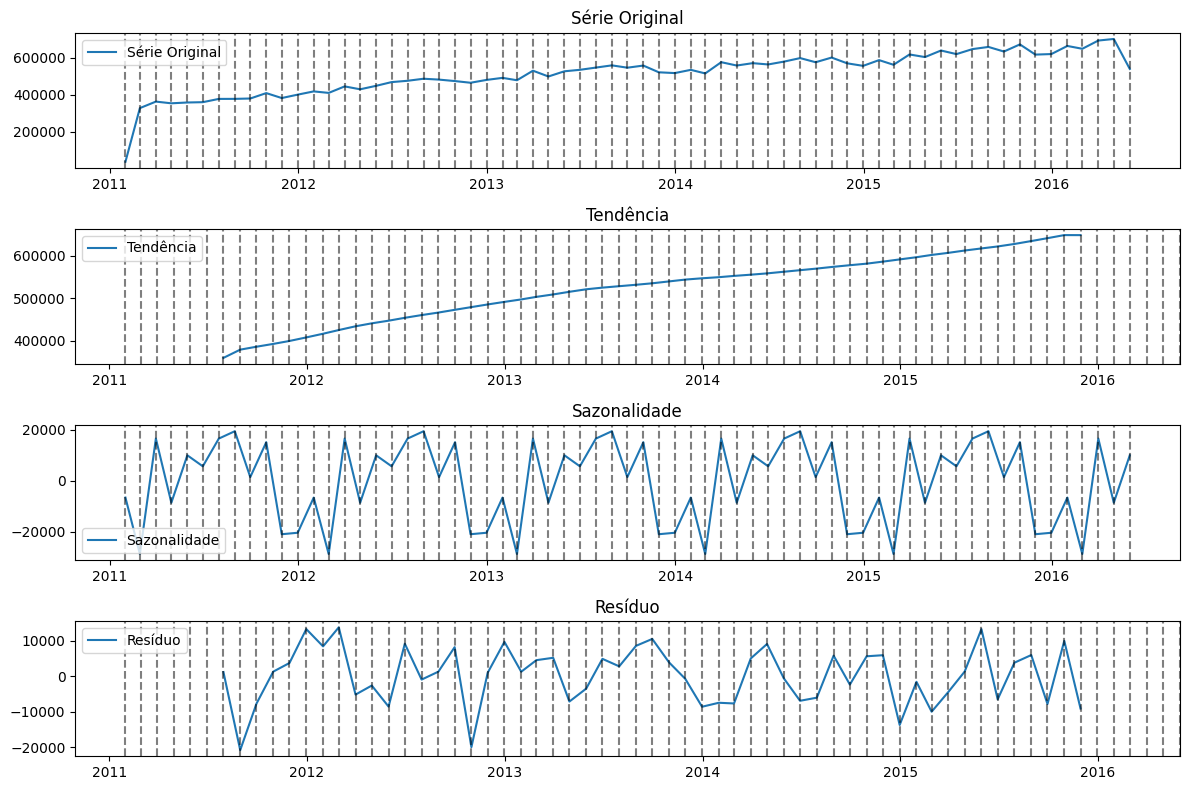

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Exemplo de DataFrame, substitua pelo seu DataFrame real
# df = pd.read_csv('seu_arquivo.csv', parse_dates=['date'], index_col='date')

# Supondo que seu DataFrame tenha uma coluna 'value' e um índice de data
df_mensal = df['value'].resample('M').sum()
result = seasonal_decompose(df_mensal, model='addictive')

plt.figure(figsize=(12, 8))

# Série Original
plt.subplot(411)
plt.plot(df_mensal, label='Série Original')
plt.title('Série Original')
plt.legend()
for date in df_mensal.index:
    plt.axvline(date, color='k', linestyle='--', alpha=0.5)

# Tendência
plt.subplot(412)
plt.plot(result.trend, label='Tendência')
plt.title('Tendência')
plt.legend()
for date in df_mensal.index:
    plt.axvline(date, color='k', linestyle='--', alpha=0.5)

# Sazonalidade
plt.subplot(413)
plt.plot(result.seasonal, label='Sazonalidade')
plt.title('Sazonalidade')
plt.legend()
for date in df_mensal.index:
    plt.axvline(date, color='k', linestyle='--', alpha=0.5)

# Resíduo
plt.subplot(414)
plt.plot(result.resid, label='Resíduo')
plt.title('Resíduo')
plt.legend()
for date in df_mensal.index:
    plt.axvline(date, color='k', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Na análise da decomposição sazonal da série temporal, utilizamos o modelo aditivo, onde a série original é a soma da tendência, sazonalidade e resíduo das vendas. A partir da decomposição, observamos uma tendência de crescimento com flutuações ao longo dos anos, sugerindo a presença de sazonalidade.

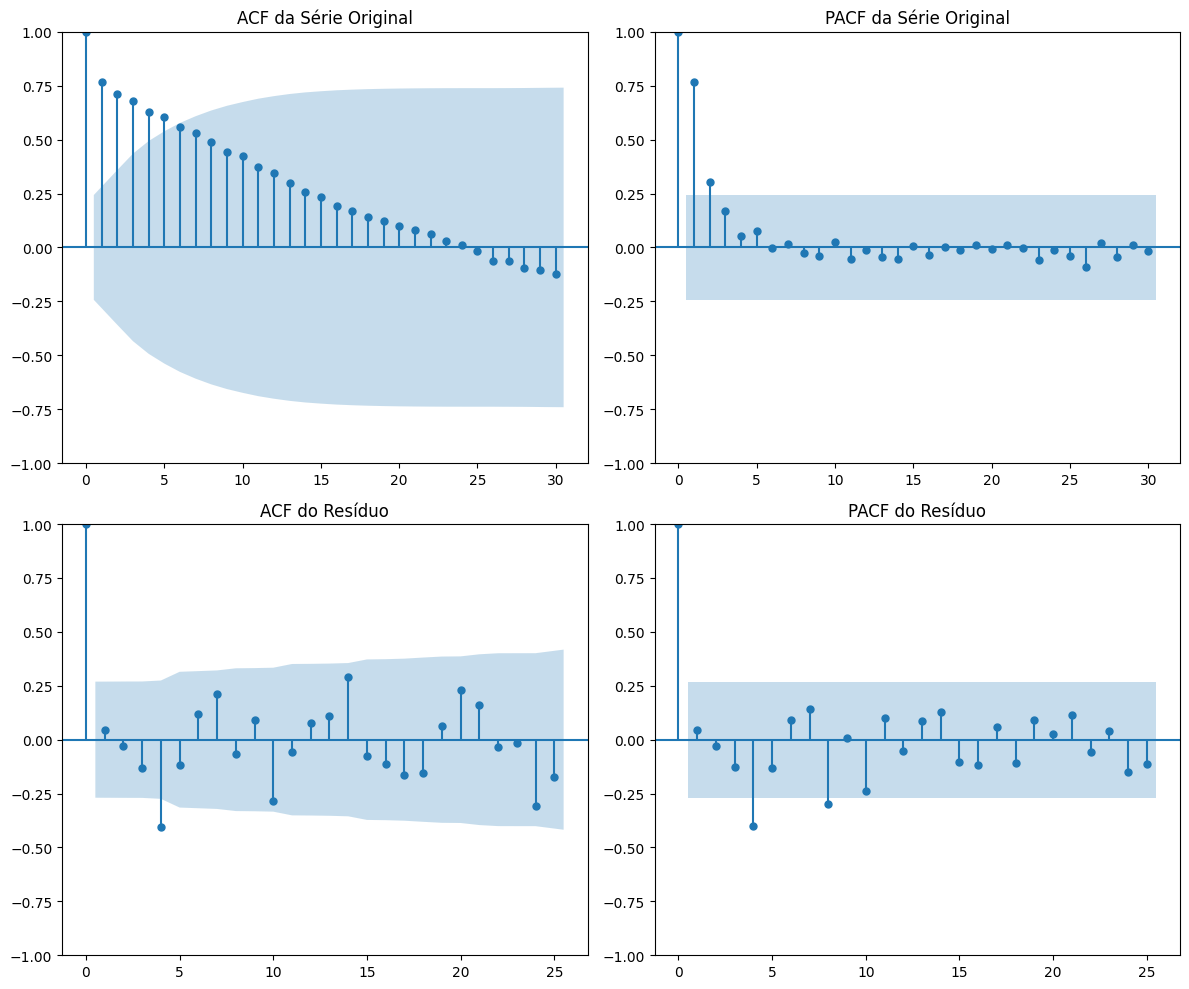

In [ ]:

plt.figure(figsize=(12, 10))

# Subplot 1: ACF e PACF da série original
plt.subplot(221)
plot_acf(df_mensal, ax=plt.gca(), lags=30)
plt.title('ACF da Série Original')

plt.subplot(222)
plot_pacf(df_mensal, ax=plt.gca(), lags=30)
plt.title('PACF da Série Original')

# Subplot 2: ACF e PACF dos resíduos
plt.subplot(223)
plot_acf(result.resid.dropna(), ax=plt.gca(), lags=25)
plt.title('ACF do Resíduo')

plt.subplot(224)
plot_pacf(result.resid.dropna(), ax=plt.gca(), lags=25)
plt.title('PACF do Resíduo')

plt.tight_layout()
plt.show()


A combinação do decaimento gradual na ACF (Autocorrelation Function) e do corte abrupto na PACF (Partial Autocorrelation Function) após o lag 1 sugere que um modelo Autoregressivo (AR) de ordem 1, ou seja, AR(1), pode ser adequado para modelar essa série temporal. No modelo AR(1), o valor atual da série é influenciado apenas pelo valor imediatamente anterior, e essa influência diminui exponencialmente à medida que nos afastamos no tempo.

#####Estado

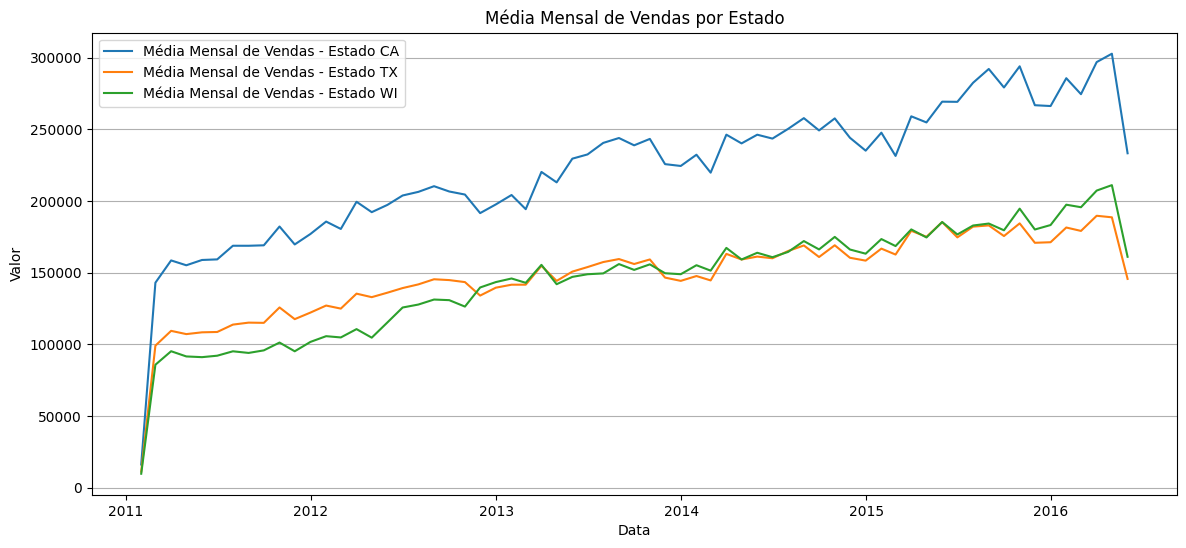

In [ ]:
# df.set_index('date', inplace=True)
# Calcular média mensal por i
sum_mensal = df.groupby(['state_id']).resample('M')['value'].sum().reset_index()

# Iterar sobre cada i
ids = sum_mensal['state_id'].unique()

plt.figure(figsize=(14, 6))

for i in ids:
    dados_estado = sum_mensal[sum_mensal['state_id'] == i]
    plt.plot(dados_estado['date'], dados_estado['value'], label=f'Média Mensal de Vendas - Estado {i}')

plt.title('Média Mensal de Vendas por Estado')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(axis='y')
plt.show()

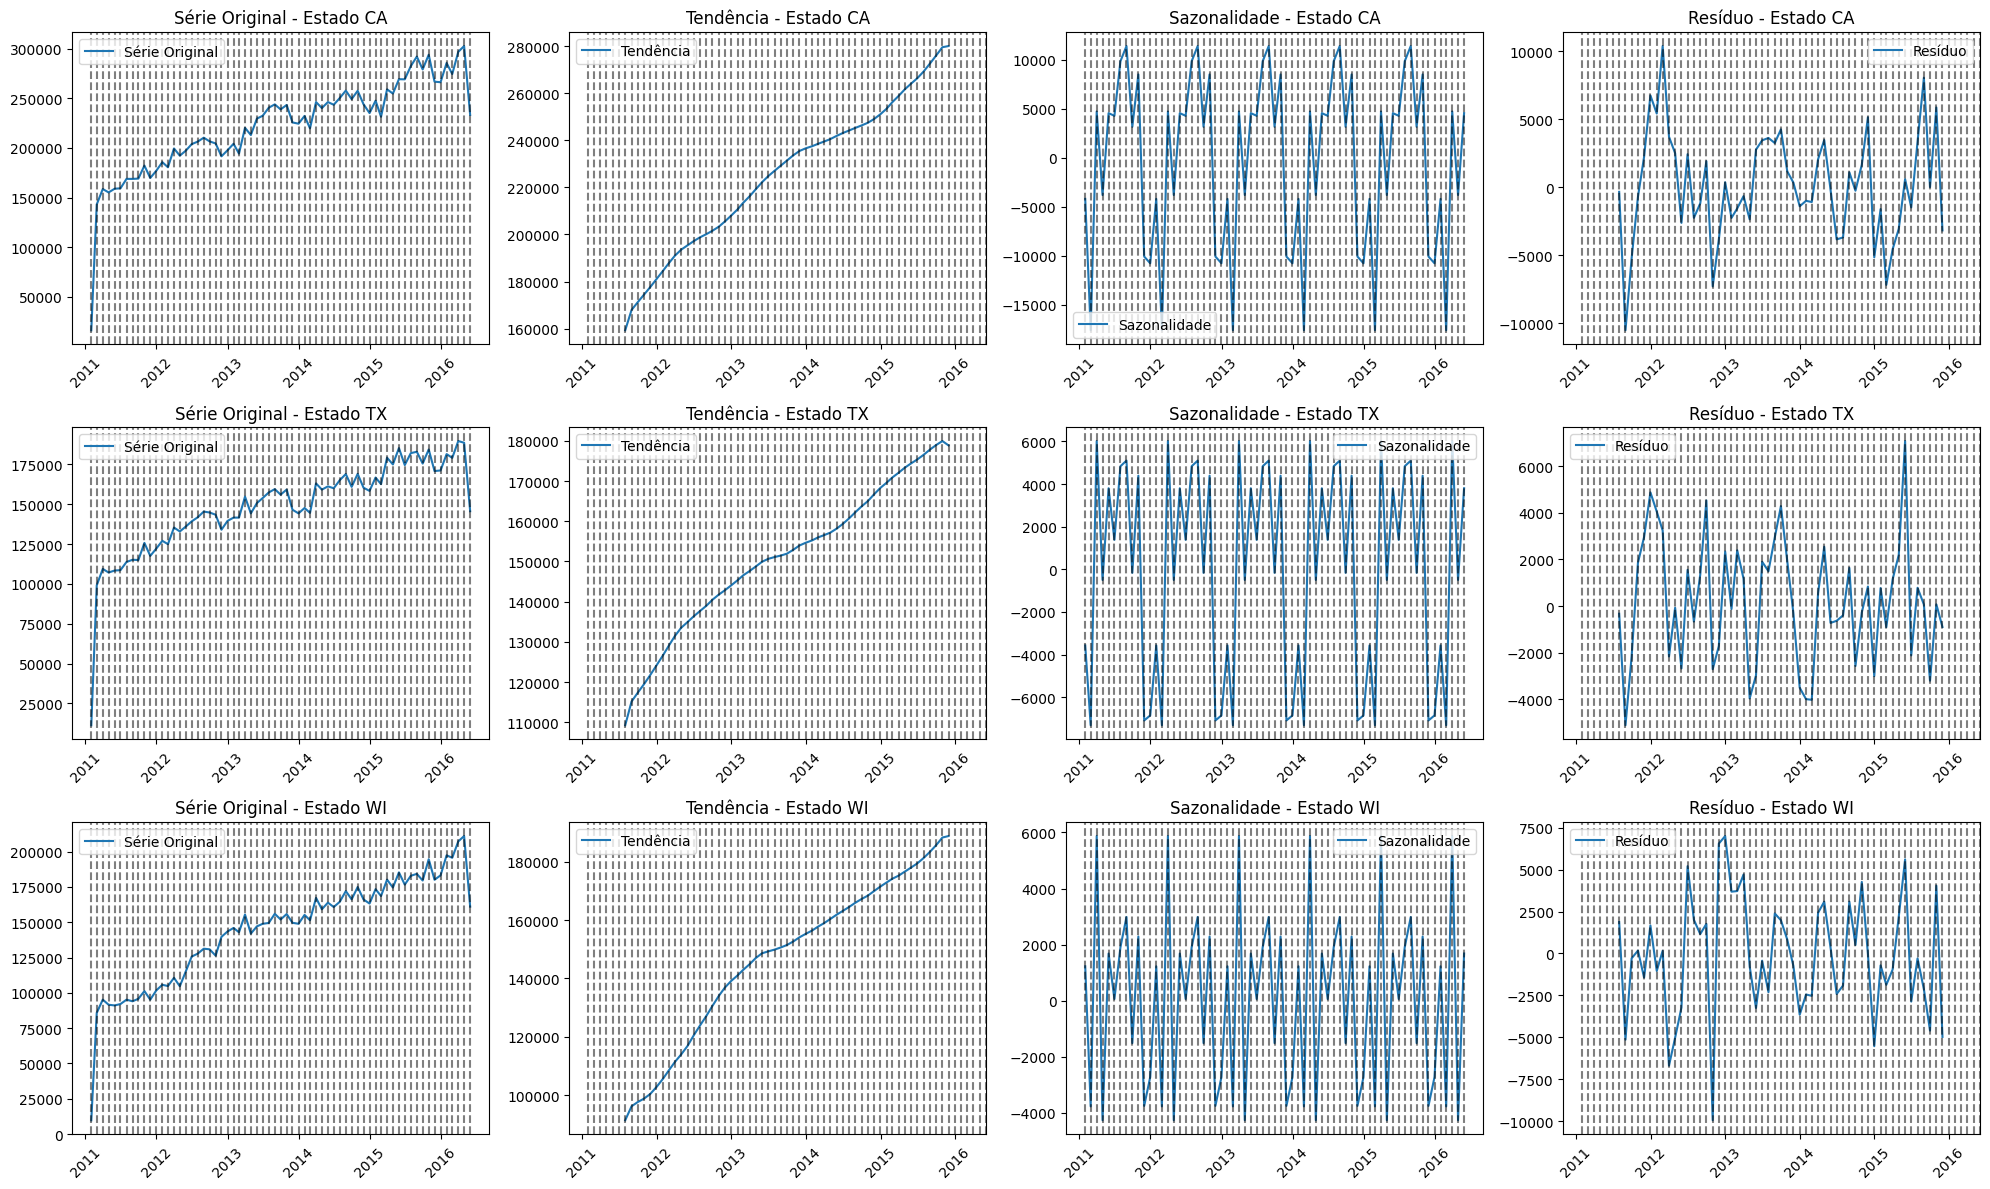

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Suponha que 'df' já está carregado com seus dados

# Aumentar o tamanho da figura
plt.figure(figsize=(20, 12))

# Iterar sobre cada state_id
ids = df['state_id'].unique()

for i, state_id in enumerate(ids, 1):
    # Filtrar dados para o estado atual
    df_state = df[df['state_id'] == state_id]

    # Calcular média mensal para o estado atual
    df_mensal = df_state['value'].resample('M').sum()

    # Decomposição sazonal usando seasonal_decompose
    result = seasonal_decompose(df_mensal, model='additive')

    # Plotar cada componente
    plt.subplot(len(ids), 4, i*4-3)
    plt.plot(df_mensal, label='Série Original')
    plt.title(f'Série Original - Estado {state_id}')
    plt.legend(fontsize=10)  # Ajuste o tamanho da fonte da legenda
    plt.xticks(rotation=45)  # Rotaciona os ticks do eixo x para melhorar a legibilidade
    for date in df_mensal.index:
        plt.axvline(date, color='k', linestyle='--', alpha=0.5)

    plt.subplot(len(ids), 4, i*4-2)
    plt.plot(result.trend, label='Tendência')
    plt.title(f'Tendência - Estado {state_id}')
    plt.legend(fontsize=10)  # Ajuste o tamanho da fonte da legenda
    plt.xticks(rotation=45)  # Rotaciona os ticks do eixo x para melhorar a legibilidade
    for date in df_mensal.index:
        plt.axvline(date, color='k', linestyle='--', alpha=0.5)

    plt.subplot(len(ids), 4, i*4-1)
    plt.plot(result.seasonal, label='Sazonalidade')
    plt.title(f'Sazonalidade - Estado {state_id}')
    plt.legend(fontsize=10)  # Ajuste o tamanho da fonte da legenda
    plt.xticks(rotation=45)  # Rotaciona os ticks do eixo x para melhorar a legibilidade
    for date in df_mensal.index:
        plt.axvline(date, color='k', linestyle='--', alpha=0.5)

    plt.subplot(len(ids), 4, i*4)
    plt.plot(result.resid, label='Resíduo')
    plt.title(f'Resíduo - Estado {state_id}')
    plt.legend(fontsize=10)  # Ajuste o tamanho da fonte da legenda
    plt.xticks(rotation=45)  # Rotaciona os ticks do eixo x para melhorar a legibilidade
    for date in df_mensal.index:
        plt.axvline(date, color='k', linestyle='--', alpha=0.5)

# Ajusta o layout da figura para melhorar a disposição dos subplots
plt.tight_layout()

# Mostra a figura
plt.show()


Analisando o estado: CA


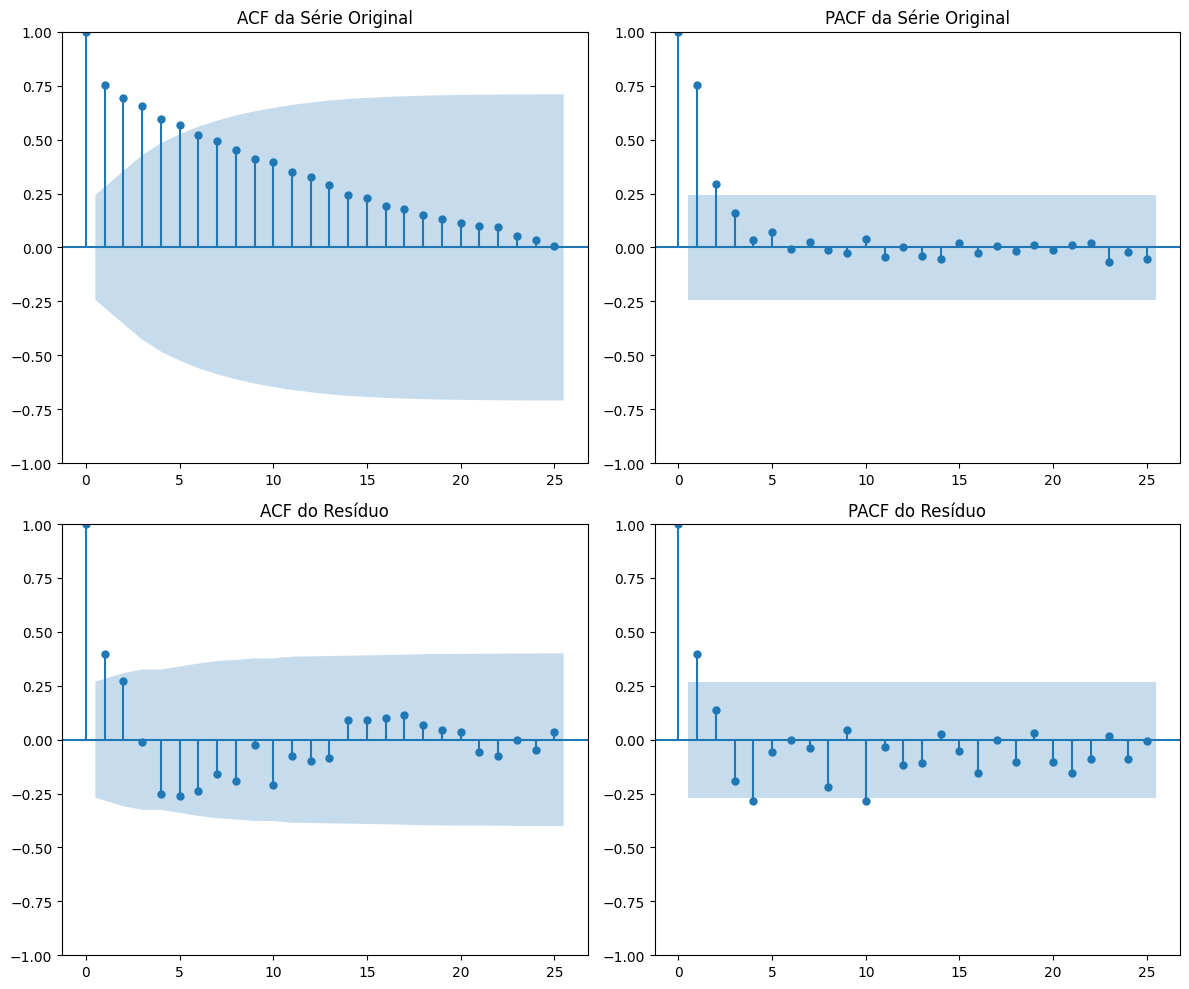

Analisando o estado: TX


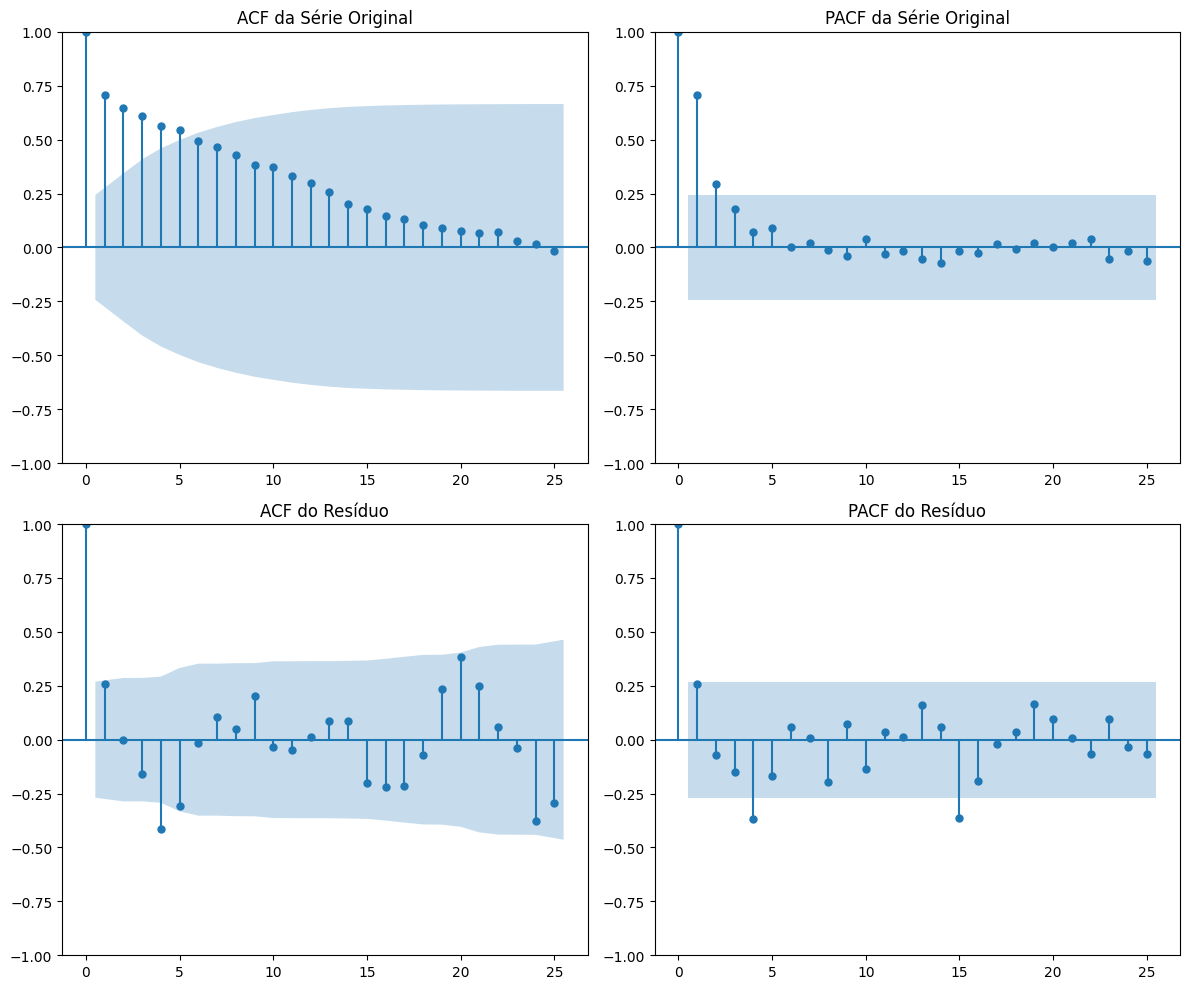

Analisando o estado: WI


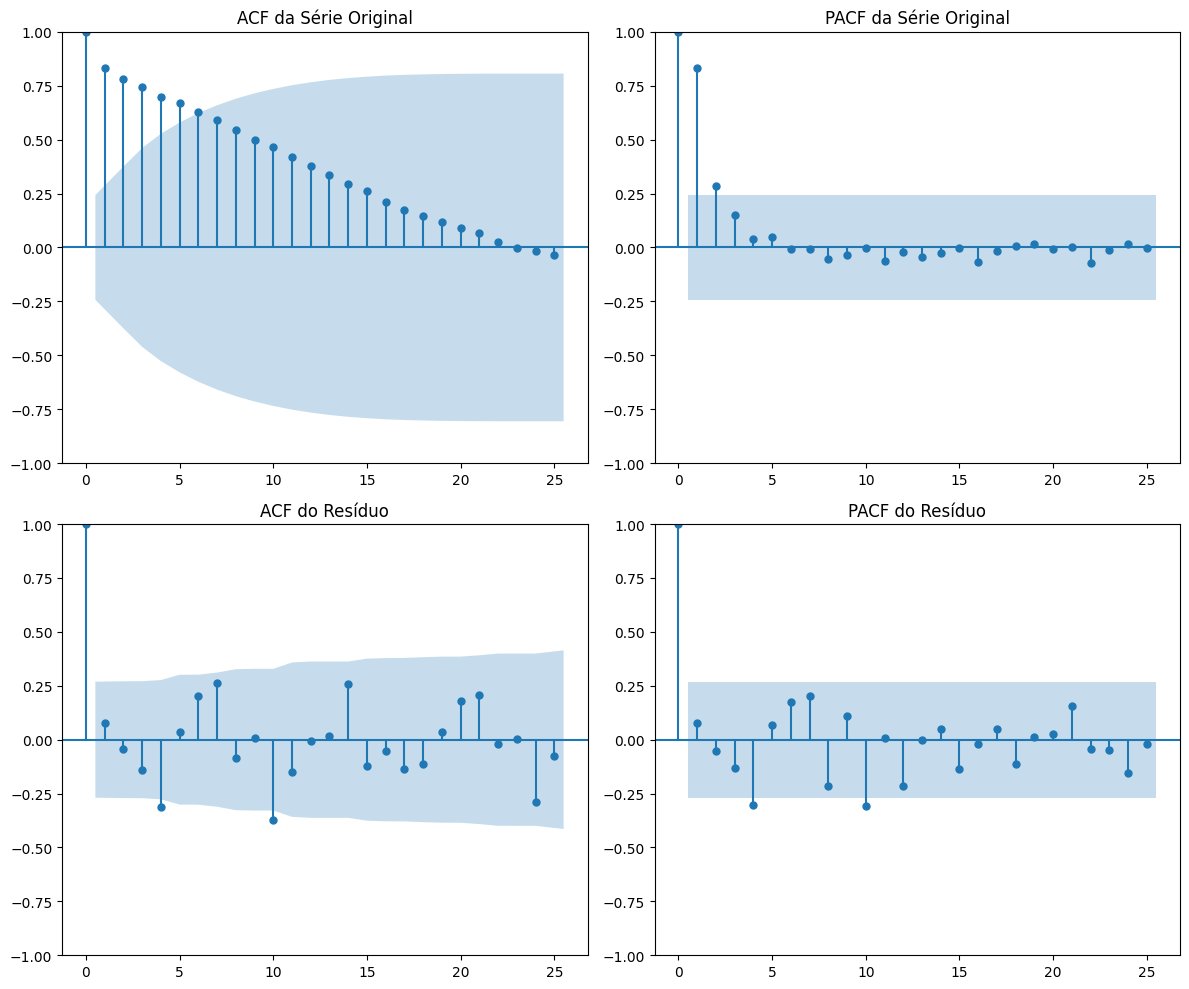

In [ ]:
df_mensal = pd.DataFrame(df.groupby('state_id').resample('M')['value'].sum()).reset_index()
df_mensal.set_index('date', inplace=True)
# Sua função acf_pacf ajustada para plotar em subplots
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(12, 10))

    # Subplot 1: ACF da série original
    plt.subplot(221)
    plot_acf(x, lags=qtd_lag, ax=plt.gca())
    plt.title('ACF da Série Original')

    # Subplot 2: PACF da série original
    plt.subplot(222)
    plot_pacf(x, lags=qtd_lag, ax=plt.gca())
    plt.title('PACF da Série Original')

    # Calcula a decomposição sazonal da série
    result = seasonal_decompose(x, model='additive')

    # Subplot 3: ACF dos resíduos
    plt.subplot(223)
    plot_acf(result.resid.dropna(), lags=qtd_lag, ax=plt.gca())
    plt.title('ACF do Resíduo')

    # Subplot 4: PACF dos resíduos
    plt.subplot(224)
    plot_pacf(result.resid.dropna(), lags=qtd_lag, ax=plt.gca())
    plt.title('PACF do Resíduo')

    plt.tight_layout()
    plt.show()

# Número de lags desejado
qtd_lag = 25

# Agrupando o DataFrame pela coluna 'state_id'
groups = df_mensal.groupby('state_id')

# Iterando sobre cada grupo
for state_id, group in groups:
    print(f"Analisando o estado: {state_id}")
    acf_pacf(group['value'], qtd_lag)


A combinação do decaimento gradual na ACF (Autocorrelation Function) e do corte abrupto na PACF (Partial Autocorrelation Function) após o lag 1 sugere que um modelo Autoregressivo (AR) de ordem 1, ou seja, AR(1), pode ser adequado para modelar essa série temporal. No modelo AR(1), o valor atual da série é influenciado apenas pelo valor imediatamente anterior, e essa influência diminui exponencialmente à medida que nos afastamos no tempo.

#####Categoria

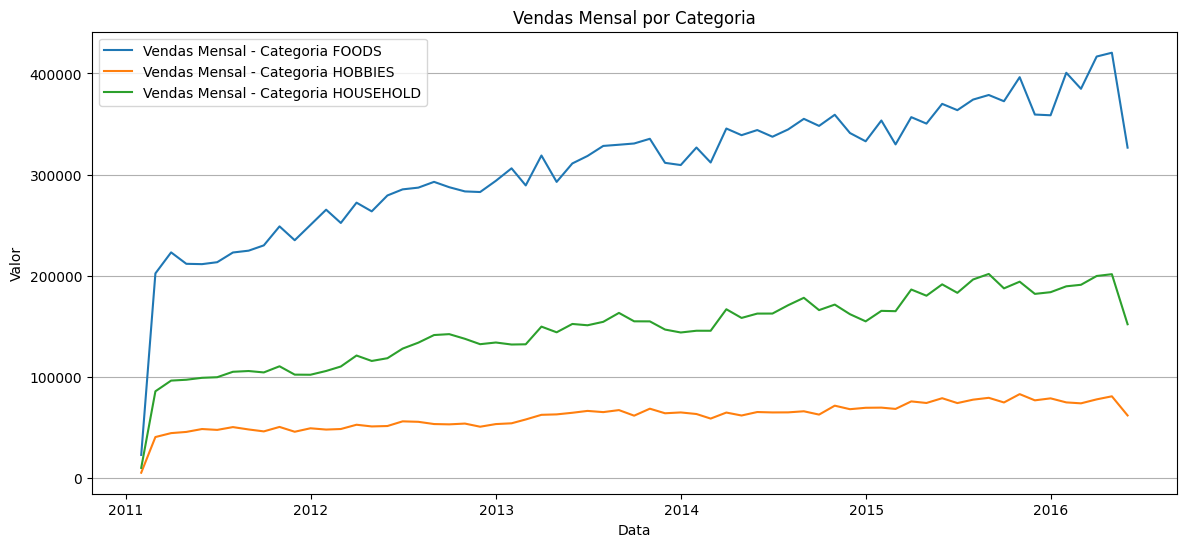

In [ ]:
# df.reset_index(inplace=True)
# Calcular média mensal por categoria
media_mensal = df.groupby(['cat_id']).resample('M')['value'].sum().reset_index()

# Iterar sobre cada categoria
estados = media_mensal['cat_id'].unique()

plt.figure(figsize=(14, 6))

for categoria in estados:
    dados_estado = media_mensal[media_mensal['cat_id'] == categoria]
    plt.plot(dados_estado['date'], dados_estado['value'], label=f'Vendas Mensal - Categoria {categoria}')

plt.title('Vendas Mensal por Categoria')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(axis='y')
plt.show()

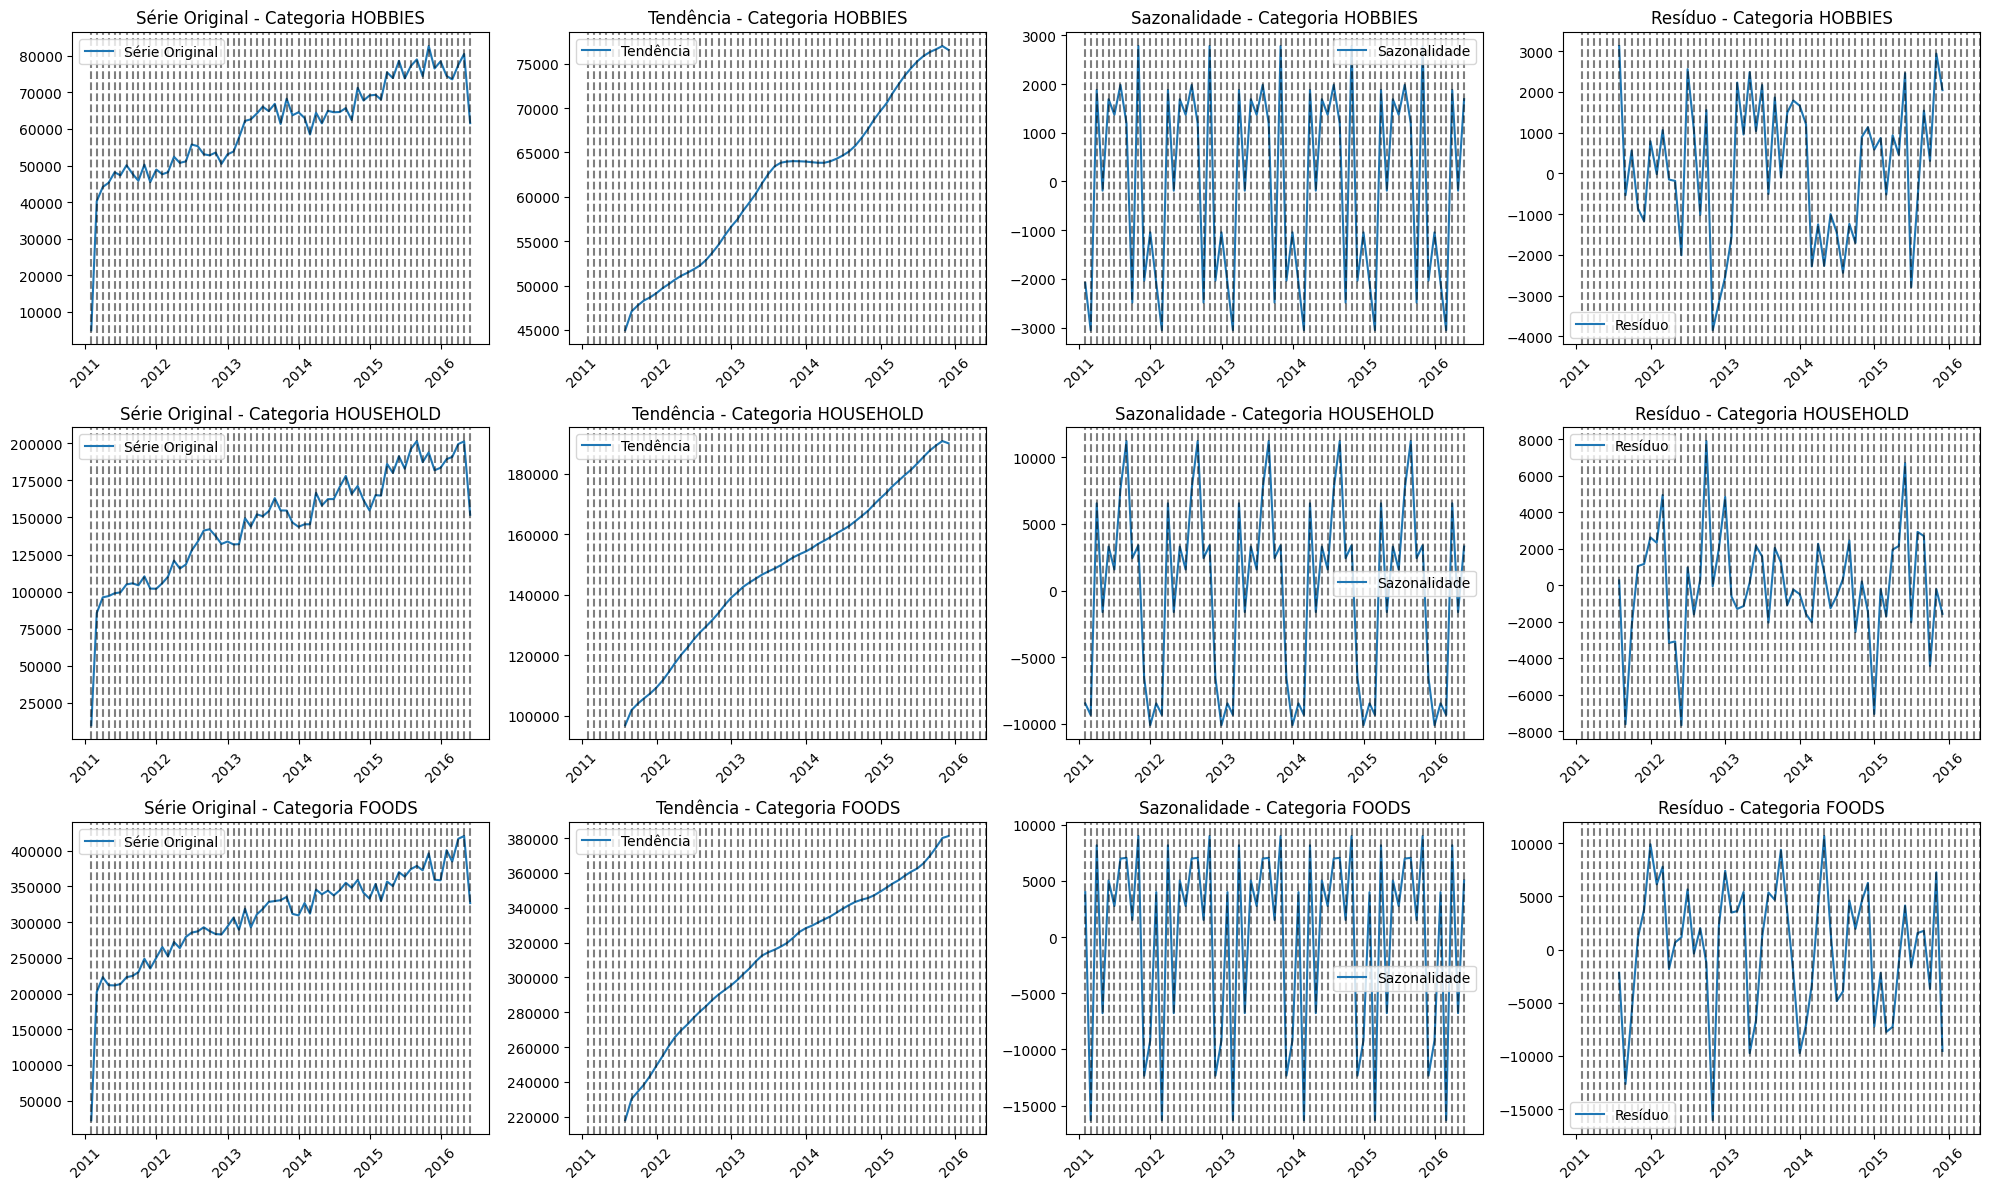

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Suponha que 'df' já está carregado com seus dados

# Aumentar o tamanho da figura
plt.figure(figsize=(20, 12))

# Iterar sobre cada cat_id
ids = df['cat_id'].unique()

for i, cat_id in enumerate(ids, 1):
    # Filtrar dados para o estado atual
    df_state = df[df['cat_id'] == cat_id]

    # Calcular média mensal para o estado atual
    df_mensal = df_state['value'].resample('M').sum()

    # Decomposição sazonal usando seasonal_decompose
    result = seasonal_decompose(df_mensal, model='additive')

    # Plotar cada componente
    plt.subplot(len(ids), 4, i*4-3)
    plt.plot(df_mensal, label='Série Original')
    plt.title(f'Série Original - Categoria {cat_id}')
    plt.legend(fontsize=10)  # Ajuste o tamanho da fonte da legenda
    plt.xticks(rotation=45)  # Rotaciona os ticks do eixo x para melhorar a legibilidade
    for date in df_mensal.index:
        plt.axvline(date, color='k', linestyle='--', alpha=0.5)

    plt.subplot(len(ids), 4, i*4-2)
    plt.plot(result.trend, label='Tendência')
    plt.title(f'Tendência - Categoria {cat_id}')
    plt.legend(fontsize=10)  # Ajuste o tamanho da fonte da legenda
    plt.xticks(rotation=45)  # Rotaciona os ticks do eixo x para melhorar a legibilidade
    for date in df_mensal.index:
        plt.axvline(date, color='k', linestyle='--', alpha=0.5)

    plt.subplot(len(ids), 4, i*4-1)
    plt.plot(result.seasonal, label='Sazonalidade')
    plt.title(f'Sazonalidade - Categoria {cat_id}')
    plt.legend(fontsize=10)  # Ajuste o tamanho da fonte da legenda
    plt.xticks(rotation=45)  # Rotaciona os ticks do eixo x para melhorar a legibilidade
    for date in df_mensal.index:
        plt.axvline(date, color='k', linestyle='--', alpha=0.5)

    plt.subplot(len(ids), 4, i*4)
    plt.plot(result.resid, label='Resíduo')
    plt.title(f'Resíduo - Categoria {cat_id}')
    plt.legend(fontsize=10)  # Ajuste o tamanho da fonte da legenda
    plt.xticks(rotation=45)  # Rotaciona os ticks do eixo x para melhorar a legibilidade
    for date in df_mensal.index:
        plt.axvline(date, color='k', linestyle='--', alpha=0.5)

# Ajusta o layout da figura para melhorar a disposição dos subplots
plt.tight_layout()

# Mostra a figura
plt.show()


Analisando a Categoria: FOODS


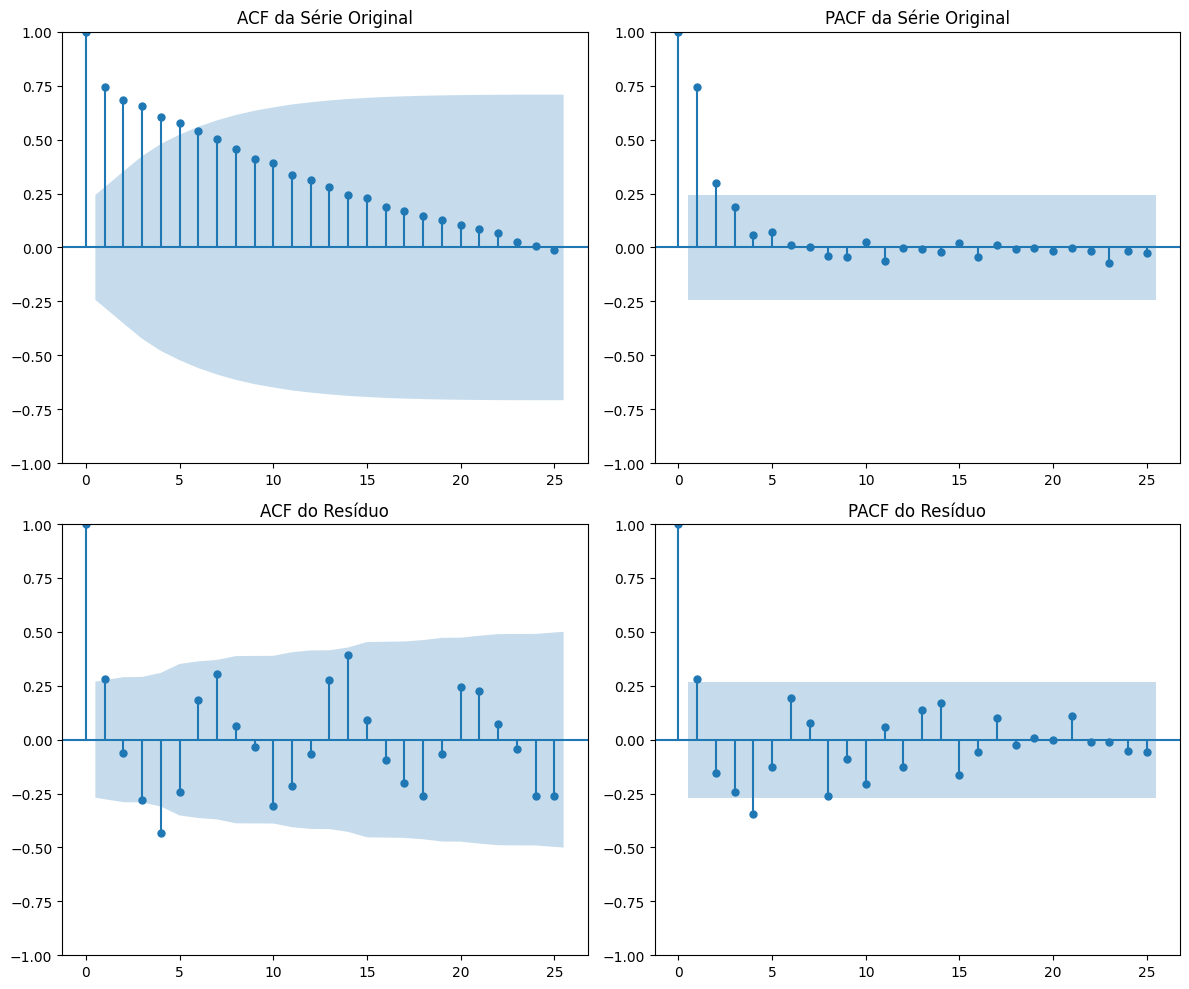

Analisando a Categoria: HOBBIES


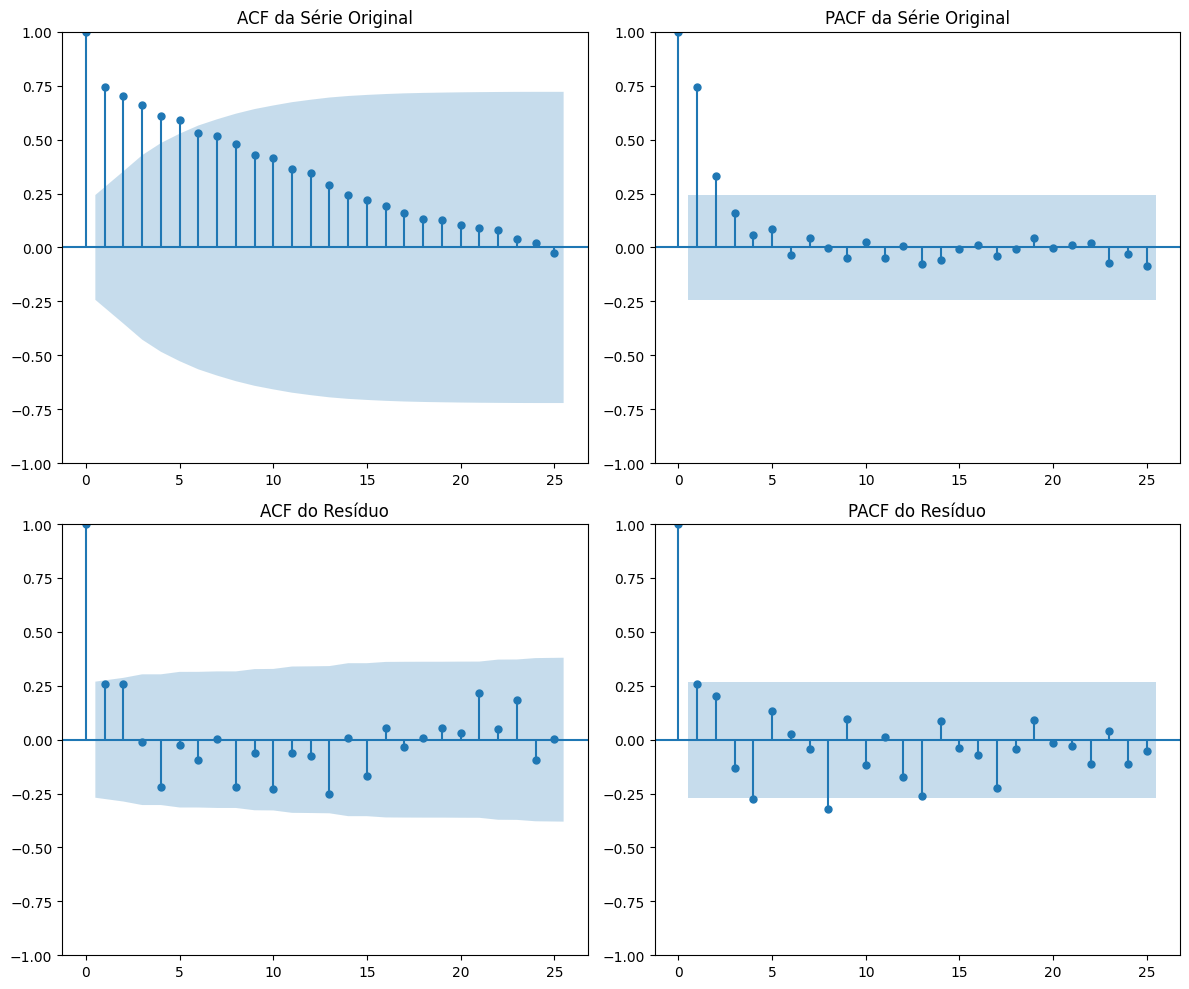

Analisando a Categoria: HOUSEHOLD


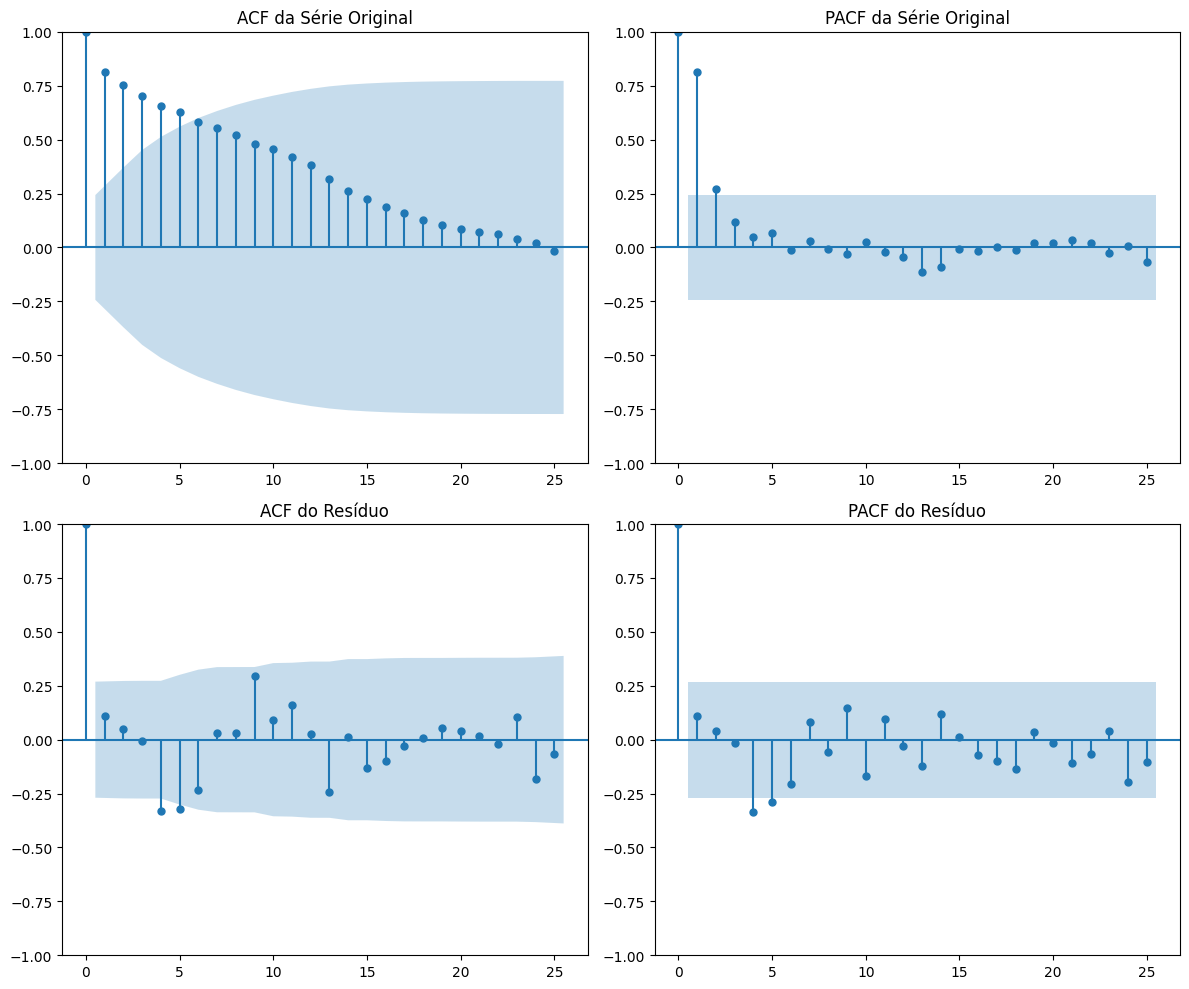

In [ ]:
df_mensal = pd.DataFrame(df.groupby('cat_id').resample('M')['value'].sum()).reset_index()
df_mensal.set_index('date', inplace=True)
# Sua função acf_pacf ajustada para plotar em subplots
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(12, 10))

    # Subplot 1: ACF da série original
    plt.subplot(221)
    plot_acf(x, lags=qtd_lag, ax=plt.gca())
    plt.title('ACF da Série Original')

    # Subplot 2: PACF da série original
    plt.subplot(222)
    plot_pacf(x, lags=qtd_lag, ax=plt.gca())
    plt.title('PACF da Série Original')

    # Calcula a decomposição sazonal da série
    result = seasonal_decompose(x, model='additive')

    # Subplot 3: ACF dos resíduos
    plt.subplot(223)
    plot_acf(result.resid.dropna(), lags=qtd_lag, ax=plt.gca())
    plt.title('ACF do Resíduo')

    # Subplot 4: PACF dos resíduos
    plt.subplot(224)
    plot_pacf(result.resid.dropna(), lags=qtd_lag, ax=plt.gca())
    plt.title('PACF do Resíduo')

    plt.tight_layout()
    plt.show()

# Número de lags desejado
qtd_lag = 25

# Agrupando o DataFrame pela coluna 'cat_id'
groups = df_mensal.groupby('cat_id')

# Iterando sobre cada grupo
for cat_id, group in groups:
    print(f"Analisando a Categoria: {cat_id}")
    acf_pacf(group['value'], qtd_lag)


#####Loja

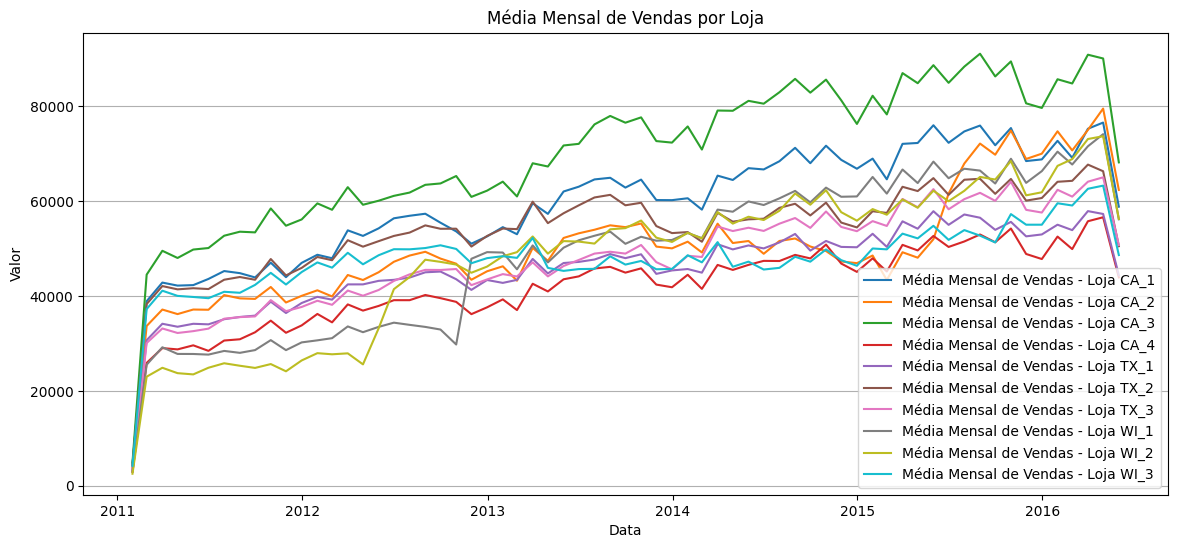

In [ ]:
# df.reset_index(inplace=True)
# Calcular média mensal por loja
media_mensal = df.groupby(['store_id']).resample('M')['value'].sum().reset_index()

# Iterar sobre cada loja
estados = media_mensal['store_id'].unique()

plt.figure(figsize=(14, 6))

for loja in estados:
    df_loja = media_mensal[media_mensal['store_id'] == loja]
    plt.plot(df_loja['date'], df_loja['value'], label=f'Média Mensal de Vendas - Loja {loja}')

plt.title('Média Mensal de Vendas por Loja')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(axis='y')
plt.show()

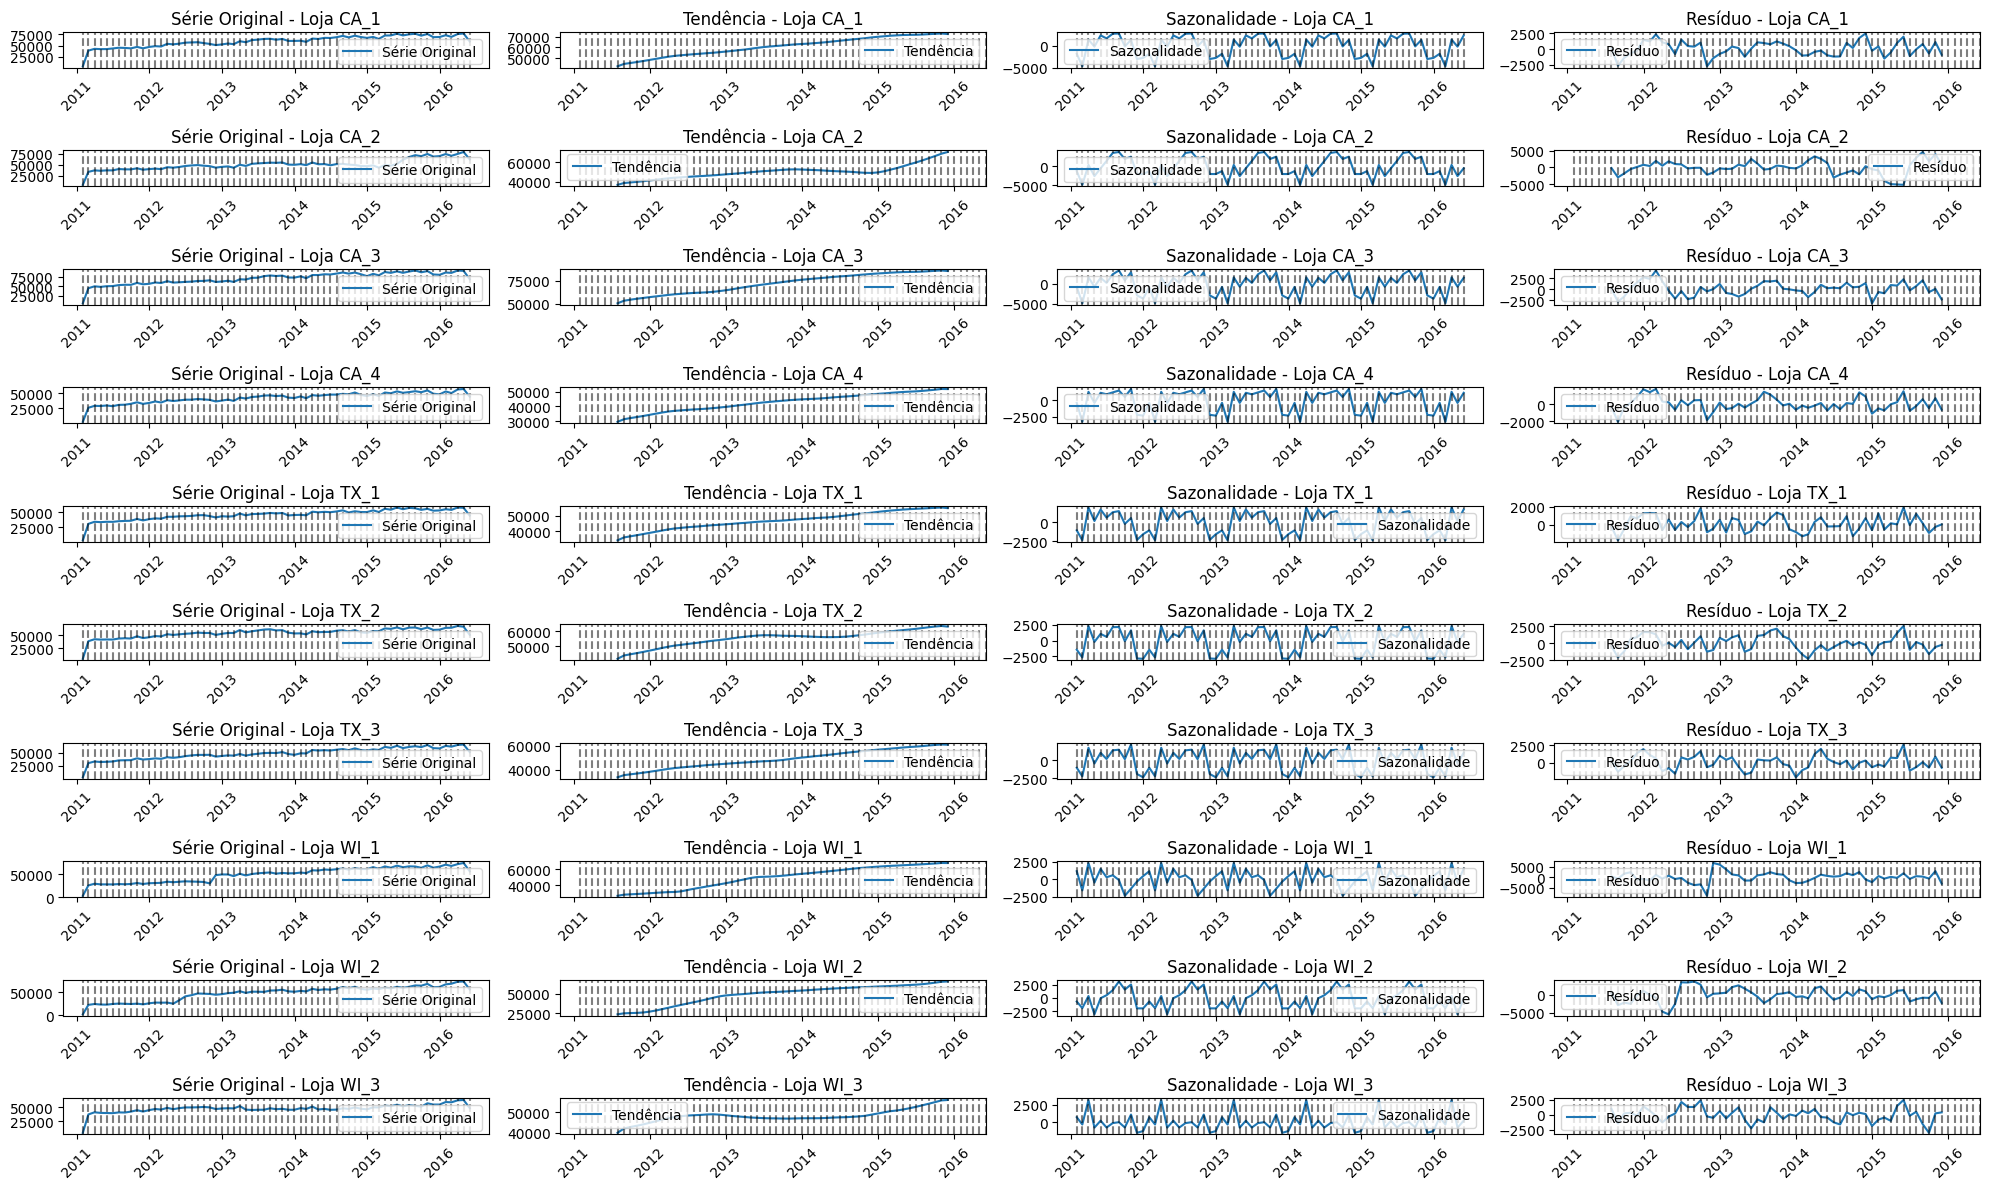

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Suponha que 'df' já está carregado com seus dados

# Aumentar o tamanho da figura
plt.figure(figsize=(20, 12))

# Iterar sobre cada store_id
ids = df['store_id'].unique()

for i, store_id in enumerate(ids, 1):
    # Filtrar dados para o estado atual
    df_state = df[df['store_id'] == store_id]

    # Calcular média mensal para o estado atual
    df_mensal = df_state['value'].resample('M').sum()

    # Decomposição sazonal usando seasonal_decompose
    result = seasonal_decompose(df_mensal, model='additive')

    # Plotar cada componente
    plt.subplot(len(ids), 4, i*4-3)
    plt.plot(df_mensal, label='Série Original')
    plt.title(f'Série Original - Loja {store_id}')
    plt.legend(fontsize=10)  # Ajuste o tamanho da fonte da legenda
    plt.xticks(rotation=45)  # Rotaciona os ticks do eixo x para melhorar a legibilidade
    for date in df_mensal.index:
        plt.axvline(date, color='k', linestyle='--', alpha=0.5)

    plt.subplot(len(ids), 4, i*4-2)
    plt.plot(result.trend, label='Tendência')
    plt.title(f'Tendência - Loja {store_id}')
    plt.legend(fontsize=10)  # Ajuste o tamanho da fonte da legenda
    plt.xticks(rotation=45)  # Rotaciona os ticks do eixo x para melhorar a legibilidade
    for date in df_mensal.index:
        plt.axvline(date, color='k', linestyle='--', alpha=0.5)

    plt.subplot(len(ids), 4, i*4-1)
    plt.plot(result.seasonal, label='Sazonalidade')
    plt.title(f'Sazonalidade - Loja {store_id}')
    plt.legend(fontsize=10)  # Ajuste o tamanho da fonte da legenda
    plt.xticks(rotation=45)  # Rotaciona os ticks do eixo x para melhorar a legibilidade
    for date in df_mensal.index:
        plt.axvline(date, color='k', linestyle='--', alpha=0.5)

    plt.subplot(len(ids), 4, i*4)
    plt.plot(result.resid, label='Resíduo')
    plt.title(f'Resíduo - Loja {store_id}')
    plt.legend(fontsize=10)  # Ajuste o tamanho da fonte da legenda
    plt.xticks(rotation=45)  # Rotaciona os ticks do eixo x para melhorar a legibilidade
    for date in df_mensal.index:
        plt.axvline(date, color='k', linestyle='--', alpha=0.5)

# Ajusta o layout da figura para melhorar a disposição dos subplots
plt.tight_layout()

# Mostra a figura
plt.show()


Na análise da decomposição sazonal da série temporal, utilizamos o modelo aditivo, onde a série original é a soma da tendência, sazonalidade e resíduo das vendas. A partir da decomposição, observamos uma tendência de crescimento com flutuações ao longo dos anos, sugerindo a presença de sazonalidade.

Analisando a Loja: CA_1


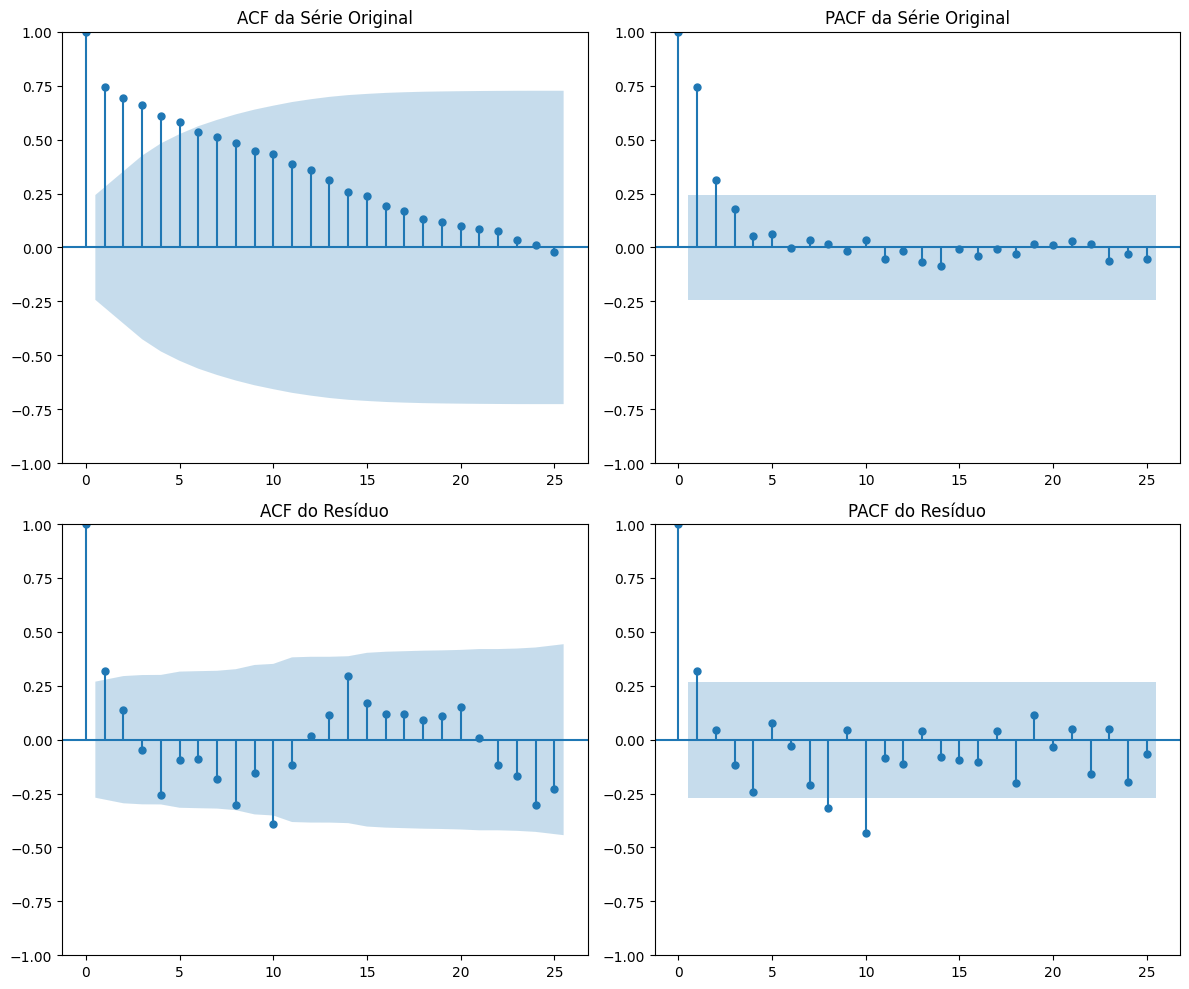

Analisando a Loja: CA_2


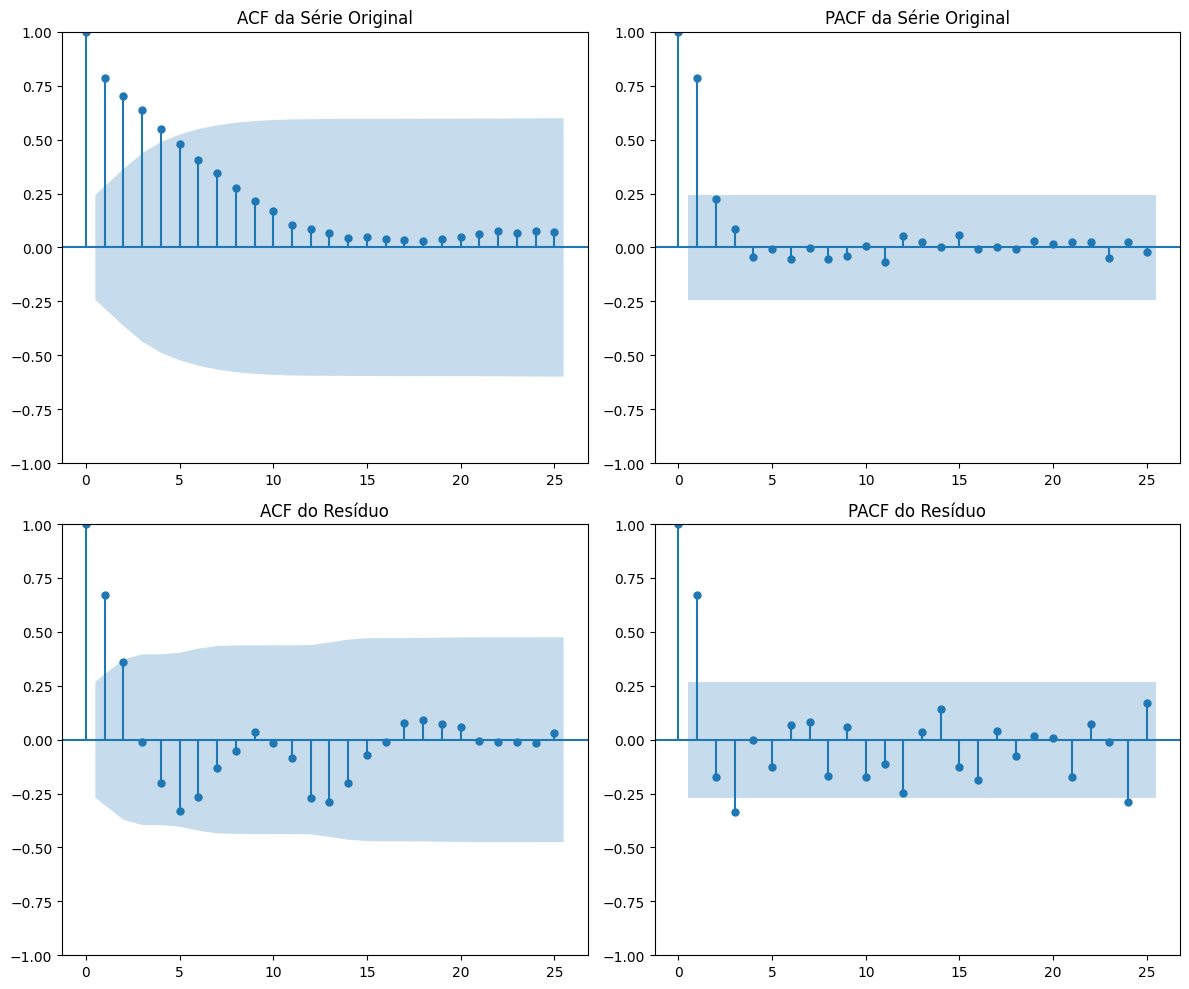

Analisando a Loja: CA_3


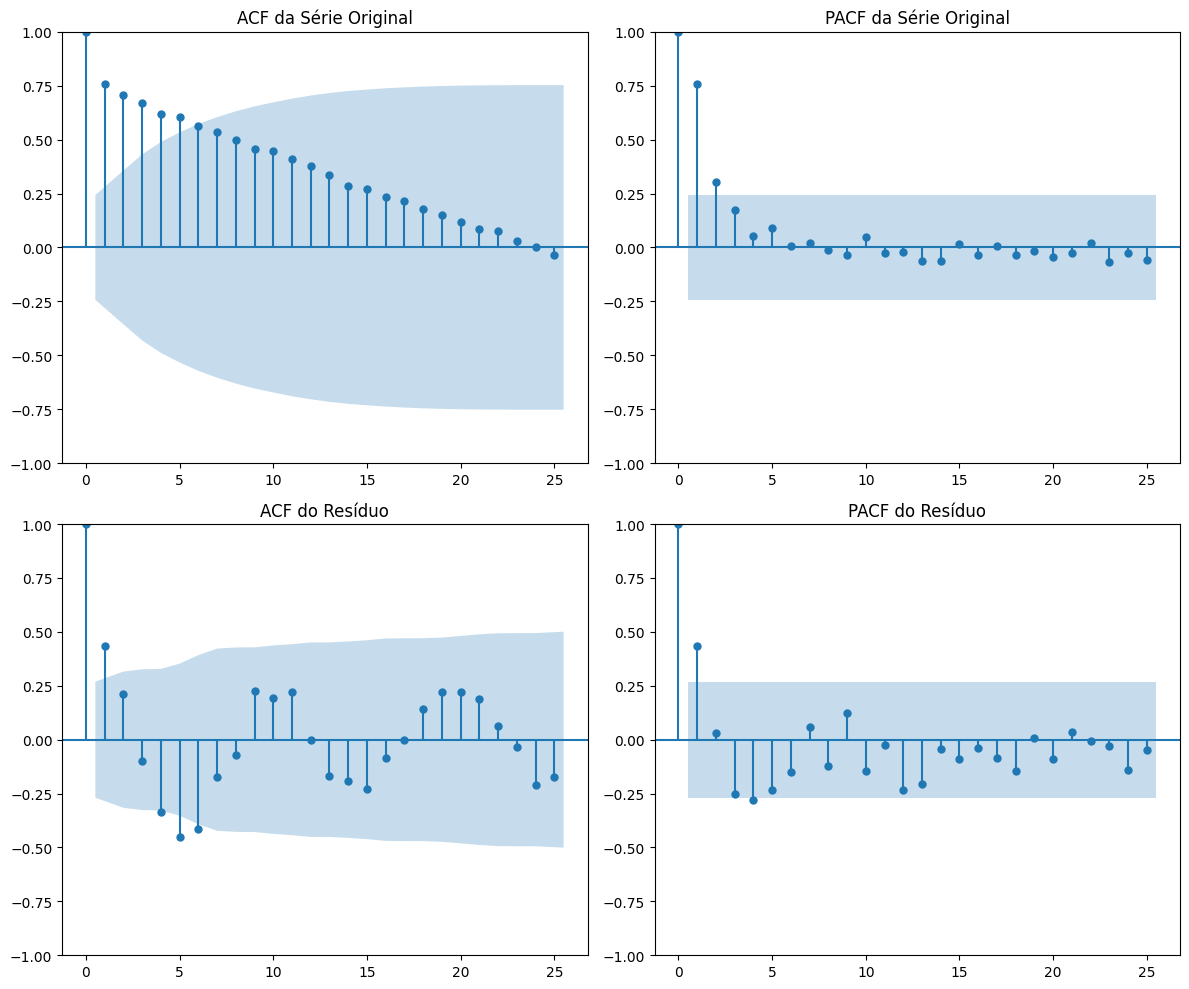

Analisando a Loja: CA_4


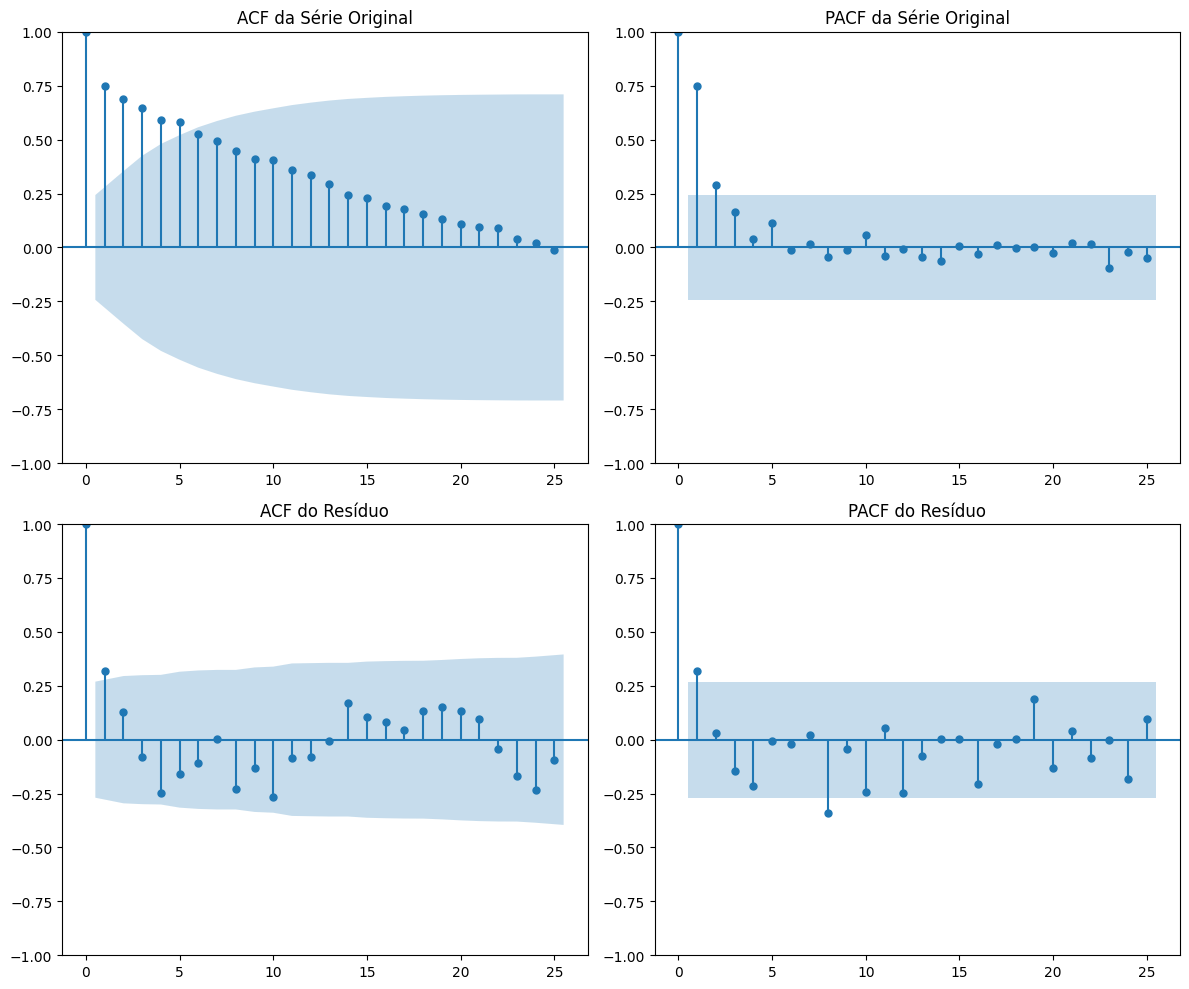

Analisando a Loja: TX_1


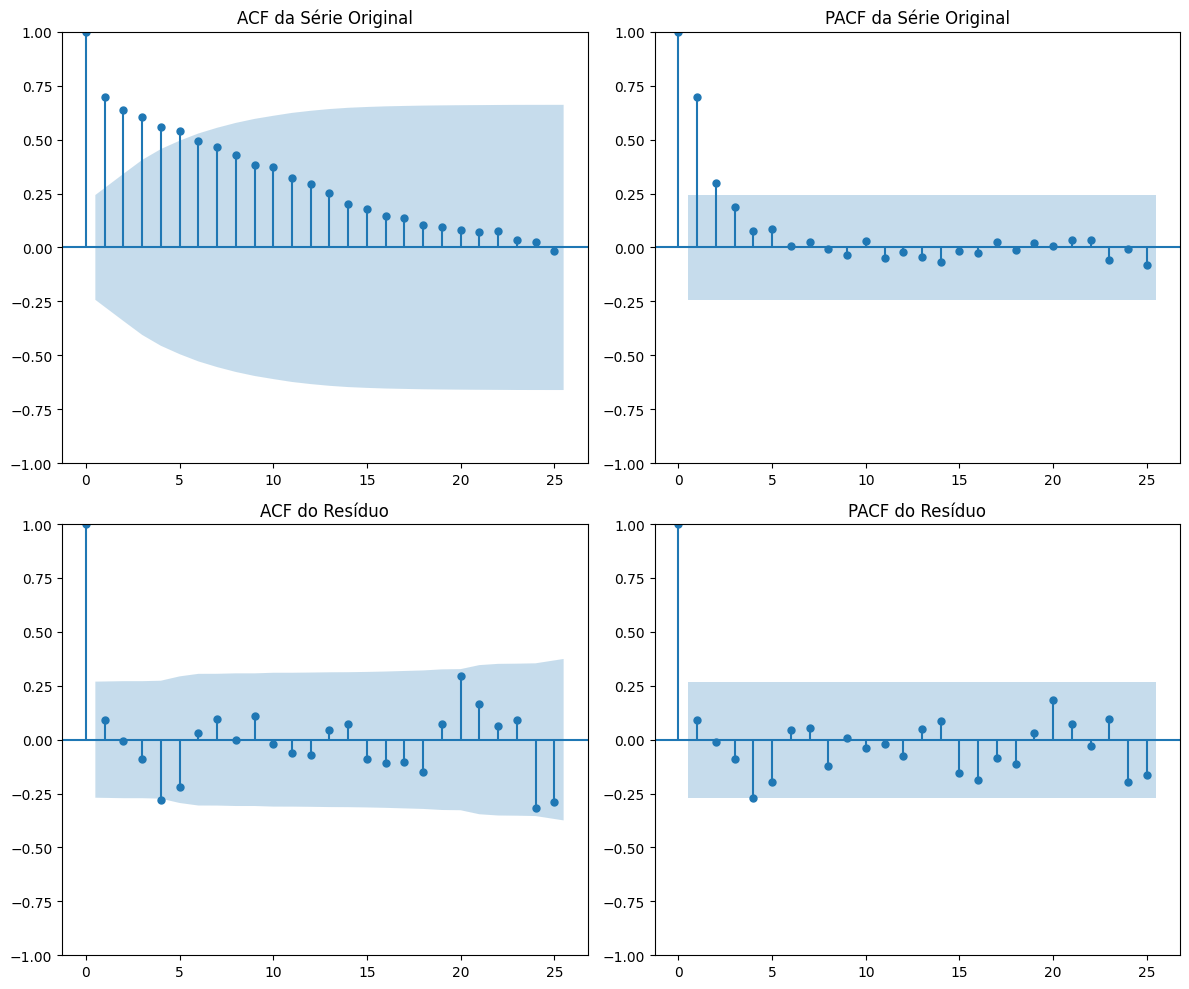

Analisando a Loja: TX_2


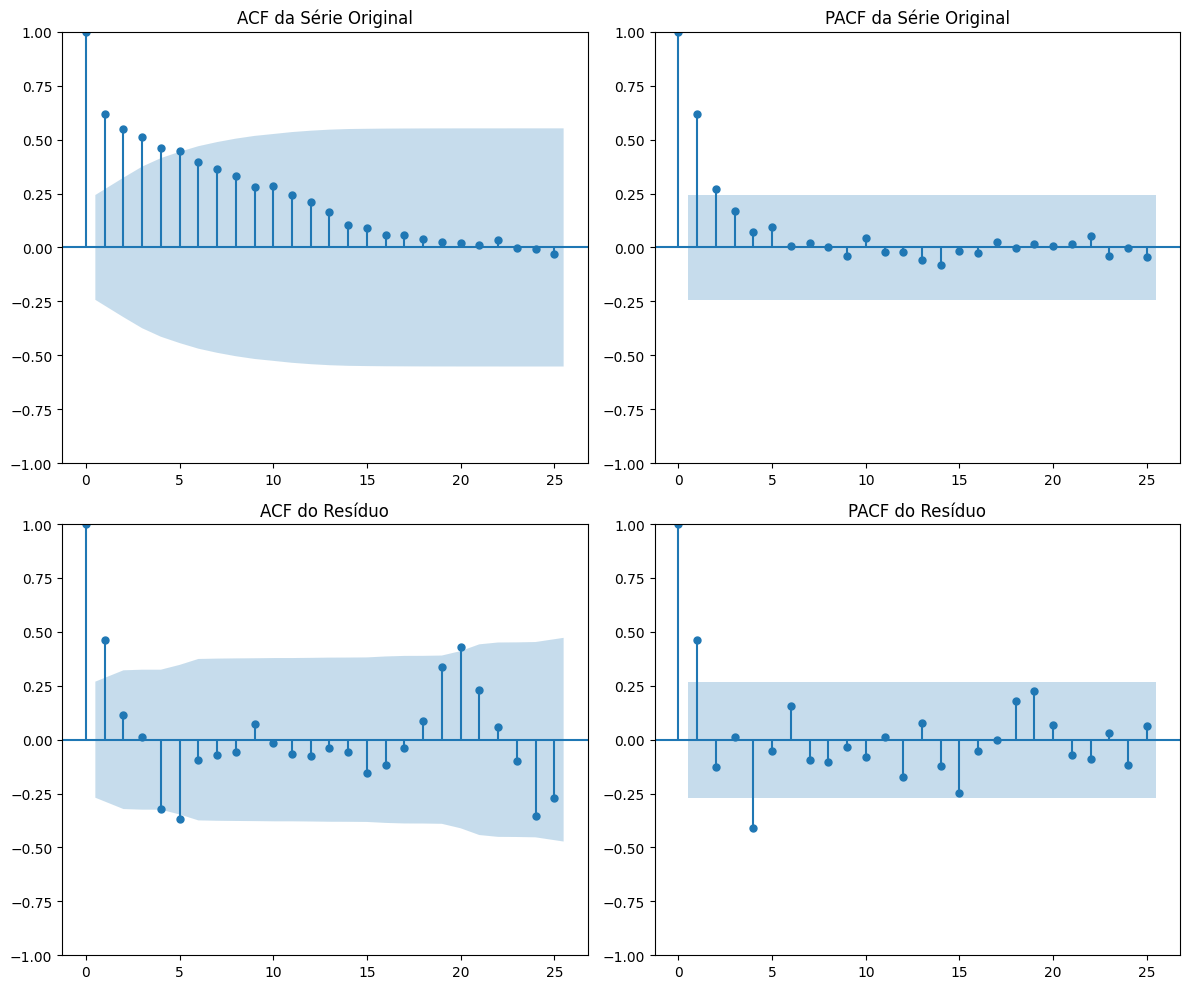

Analisando a Loja: TX_3


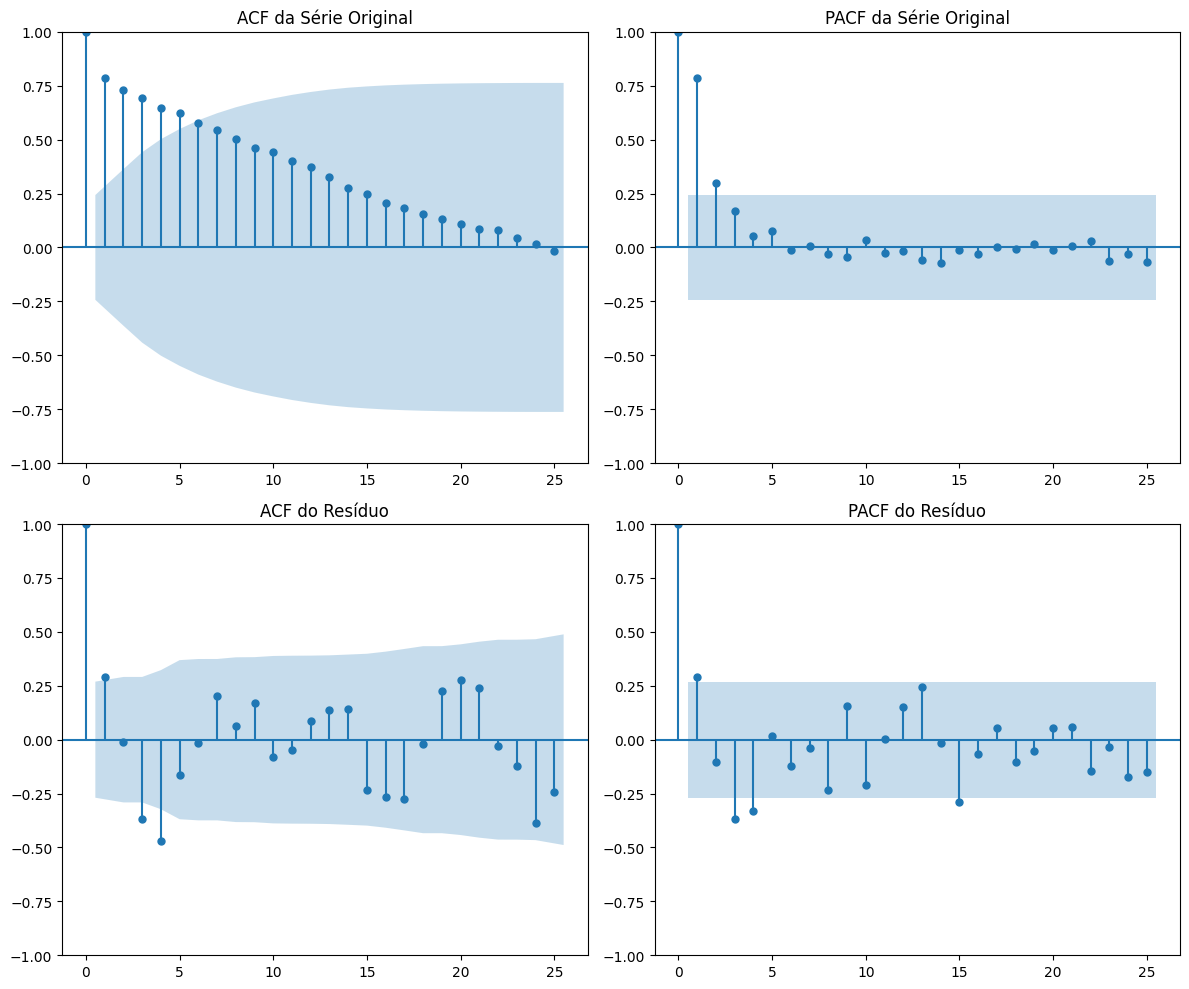

Analisando a Loja: WI_1


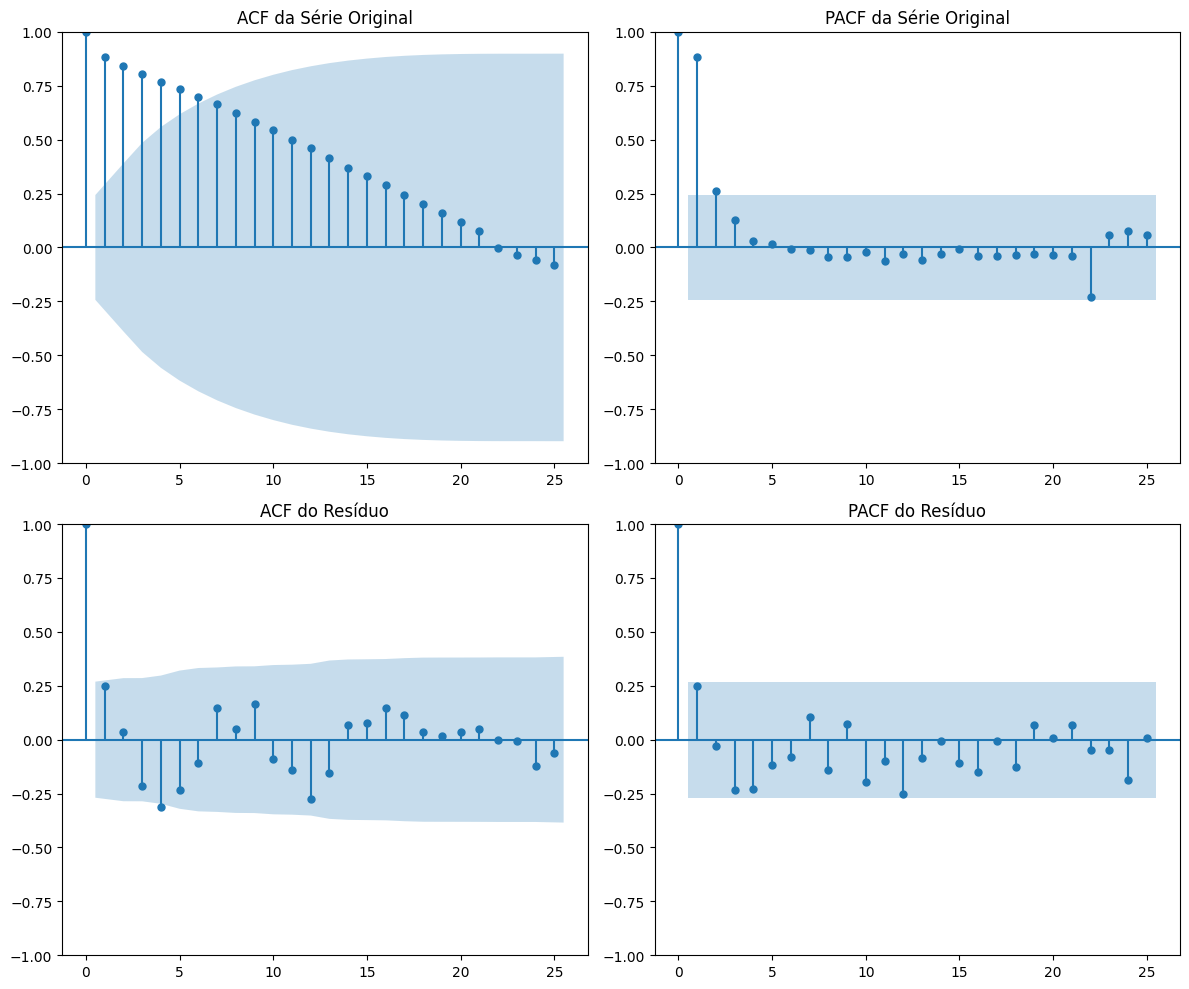

Analisando a Loja: WI_2


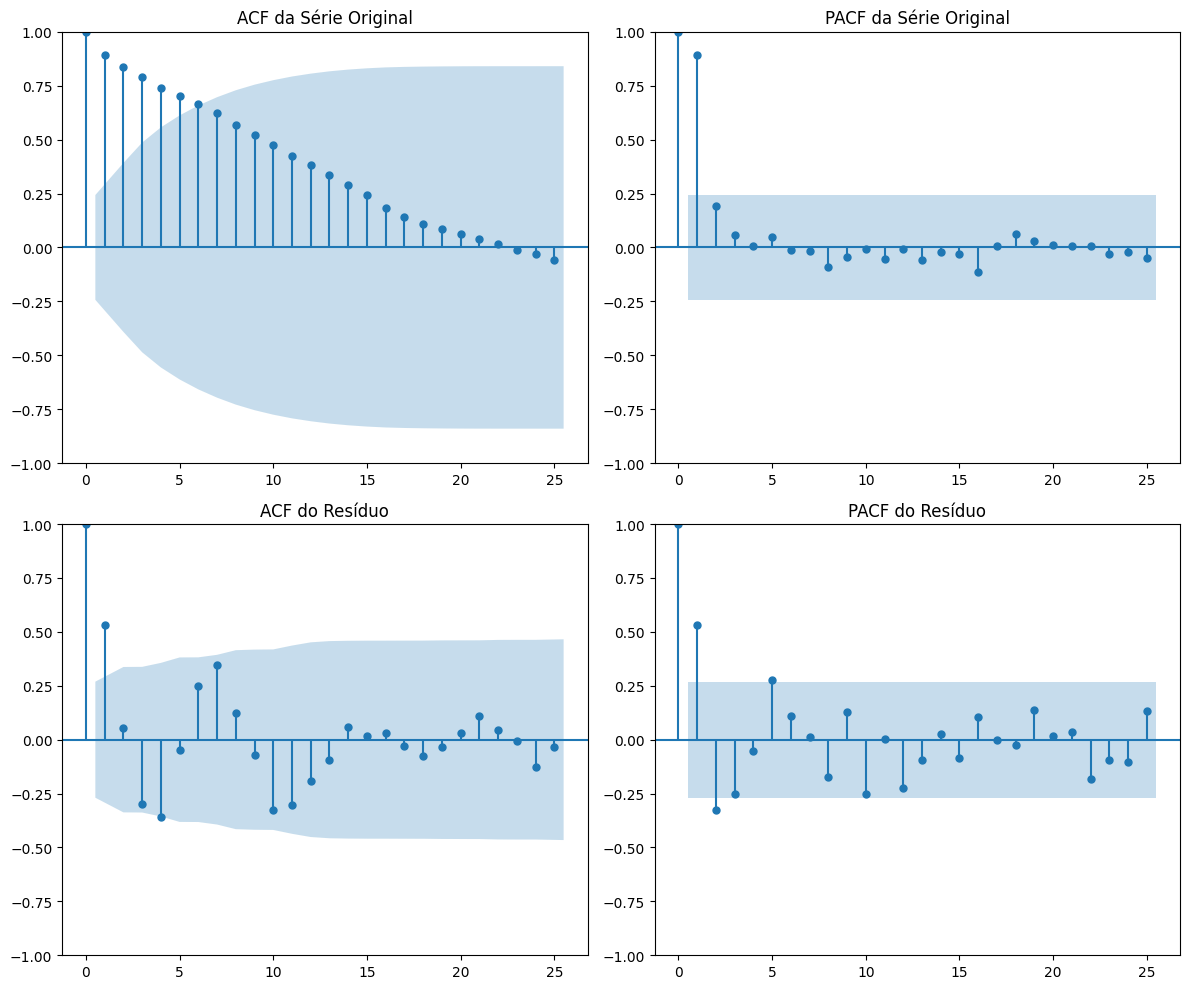

Analisando a Loja: WI_3


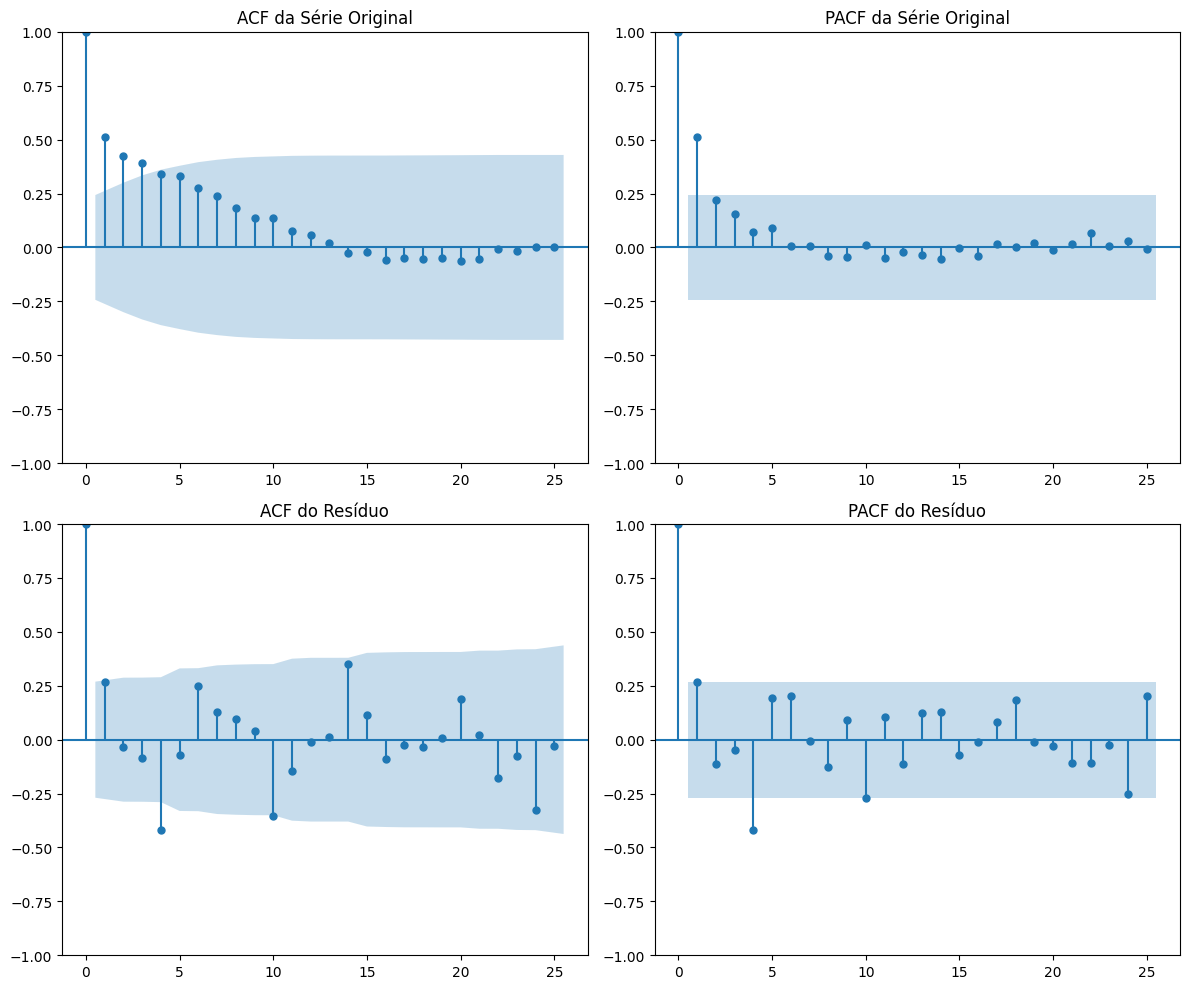

In [ ]:
df_mensal = pd.DataFrame(df.groupby('store_id').resample('M')['value'].sum()).reset_index()
df_mensal.set_index('date', inplace=True)
# Sua função acf_pacf ajustada para plotar em subplots
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(12, 10))

    # Subplot 1: ACF da série original
    plt.subplot(221)
    plot_acf(x, lags=qtd_lag, ax=plt.gca())
    plt.title('ACF da Série Original')

    # Subplot 2: PACF da série original
    plt.subplot(222)
    plot_pacf(x, lags=qtd_lag, ax=plt.gca())
    plt.title('PACF da Série Original')

    # Calcula a decomposição sazonal da série
    result = seasonal_decompose(x, model='additive')

    # Subplot 3: ACF dos resíduos
    plt.subplot(223)
    plot_acf(result.resid.dropna(), lags=qtd_lag, ax=plt.gca())
    plt.title('ACF do Resíduo')

    # Subplot 4: PACF dos resíduos
    plt.subplot(224)
    plot_pacf(result.resid.dropna(), lags=qtd_lag, ax=plt.gca())
    plt.title('PACF do Resíduo')

    plt.tight_layout()
    plt.show()

# Número de lags desejado
qtd_lag = 25

# Agrupando o DataFrame pela coluna 'store_id'
groups = df_mensal.groupby('store_id')

# Iterando sobre cada grupo
for store_id, group in groups:
    print(f"Analisando a Loja: {store_id}")
    acf_pacf(group['value'], qtd_lag)


A combinação do decaimento gradual na ACF (Autocorrelation Function) e do corte abrupto na PACF (Partial Autocorrelation Function) após o lag 1 sugere que um modelo Autoregressivo (AR) de ordem 1, ou seja, AR(1), pode ser adequado para modelar essa série temporal. No modelo AR(1), o valor atual da série é influenciado apenas pelo valor imediatamente anterior, e essa influência diminui exponencialmente à medida que nos afastamos no tempo.

#####id

In [ ]:
# df.reset_index(inplace=True)
# # Calcular média mensal por id
# media_mensal = df.groupby(['id']).resample('M', on='date')['value'].mean().reset_index()

# # Iterar sobre cada id
# estados = media_mensal['id'].unique()

# plt.figure(figsize=(14, 6))

# for id in estados:
#     dados_estado = media_mensal[media_mensal['id'] == id]
#     plt.plot(dados_estado['date'], dados_estado['value'], label=f'Média Mensal de Vendas - id {id}')

# plt.title('Média Mensal de Vendas por id')
# plt.xlabel('Data')
# plt.ylabel('Valor')
# plt.legend()
# plt.grid(axis='y')
# plt.show()

In [ ]:
# # Aumentar o tamanho da figura
# plt.figure(figsize=(16, 12))

# # Iterar sobre cada state_id
# state_ids = df['state_id'].unique()

# for i, state_id in enumerate(state_ids, 1):
#     # Filtrar dados para o estado atual
#     df_state = df[df['state_id'] == state_id]

#     # Calcular média mensal para o estado atual
#     df_mensal = df_state.set_index('date')['value'].resample('M').mean()

#     # Decomposição sazonal usando seasonal_decompose
#     result = seasonal_decompose(df_mensal, model='additive')

#     # Plotar cada componente
#     plt.subplot(len(state_ids), 4, i*4-3)
#     plt.plot(df_mensal, label='Série Original')
#     plt.title(f'Série Original - Estado {state_id}')
#     plt.legend(fontsize=10)  # Ajuste o tamanho da fonte da legenda
#     plt.xticks(rotation=45)  # Rotaciona os ticks do eixo x para melhorar a legibilidade

#     plt.subplot(len(state_ids), 4, i*4-2)
#     plt.plot(result.trend, label='Tendência')
#     plt.title(f'Tendência - Estado {state_id}')
#     plt.legend(fontsize=10)  # Ajuste o tamanho da fonte da legenda
#     plt.xticks(rotation=45)  # Rotaciona os ticks do eixo x para melhorar a legibilidade

#     plt.subplot(len(state_ids), 4, i*4-1)
#     plt.plot(result.seasonal, label='Sazonalidade')
#     plt.title(f'Sazonalidade - Estado {state_id}')
#     plt.legend(fontsize=10)  # Ajuste o tamanho da fonte da legenda
#     plt.xticks(rotation=45)  # Rotaciona os ticks do eixo x para melhorar a legibilidade

#     plt.subplot(len(state_ids), 4, i*4)
#     plt.plot(result.resid, label='Resíduo')
#     plt.title(f'Resíduo - Estado {state_id}')
#     plt.legend(fontsize=10)  # Ajuste o tamanho da fonte da legenda
#     plt.xticks(rotation=45)  # Rotaciona os ticks do eixo x para melhorar a legibilidade

# # Ajusta o layout da figura para melhorar a disposição dos subplots
# plt.tight_layout()

# # Mostra a figura
# plt.show()

Na análise da decomposição sazonal da série temporal, utilizamos o modelo aditivo, onde a série original é a soma da tendência, sazonalidade e resíduo das vendas. A partir da decomposição, observamos uma tendência de crescimento com flutuações ao longo dos anos, sugerindo a presença de sazonalidade.

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# # Calcular soma mensal por estado
# df_mensal = df.groupby(['state_id', pd.Grouper(key='date', freq='M')])['value'].sum().reset_index()

# # Sua função acf_pacf
# def acf_pacf(x, qtd_lag):
#     fig = plt.figure(figsize=(16, 10))
#     ax1 = fig.add_subplot(221)
#     plot_acf(x, lags=qtd_lag, ax=ax1)
#     ax2 = fig.add_subplot(222)
#     plot_pacf(x, lags=qtd_lag, ax=ax2)
#     plt.show()

# # Número de lags desejado
# qtd_lag = 20

# # Agrupando o DataFrame pela coluna 'state_id'
# groups = df_mensal.groupby('state_id')

# # Iterando sobre cada grupo
# for state_id, group in groups:
#     print(f"Analisando o estado: {state_id}")
#     acf_pacf(group['value'], qtd_lag)

##Algoritmo Base de Previsão de Demanda

###Adaptando Dataframe

In [ ]:
df_tot = df['value'].resample('M').sum()
df_tot = pd.DataFrame(
    {
        'ds' : df_tot.index,
        'y' : df_tot.values
    }
    )
df_tot['unique_id'] = 'Total'

In [ ]:
df_sta = df.groupby(['state_id']).resample('M')['value'].sum().reset_index()
df_sta = pd.DataFrame({
    'ds': df_sta['date'],
    'y': df_sta['value'],
    'unique_id': df_sta['state_id'],
})

In [ ]:
#VALIDANDO AGRUPAMENTOS DE DADOS
df_sta_valid = df.groupby(['date', 'state_id'])[['value']].sum()
df_sta_valid.reset_index(inplace=True)
df_sta_valid.columns = ['ds', 'unique_id', 'value']

df_sta_valid.set_index('ds', inplace=True)
df_sta_valid = df_sta_valid.groupby('unique_id').resample('M').sum().reset_index()
df_sta_valid

unique_id         ds     value
0          CA 2011-01-31   16182.0
1          CA 2011-02-28  143014.0
2          CA 2011-03-31  158549.0
3          CA 2011-04-30  155169.5
4          CA 2011-05-31  158865.0
..        ...        ...       ...
190        WI 2016-01-31  197424.0
191        WI 2016-02-29  195668.5
192        WI 2016-03-31  207275.5
193        WI 2016-04-30  211073.5
194        WI 2016-05-31  161079.5

[195 rows x 3 columns]

In [ ]:
df_ind = df.groupby(['store_id']).resample('M')['value'].sum().reset_index()
df_ind = pd.DataFrame({
    'ds': df_ind['date'],
    'y': df_ind['value'],
    'unique_id': df_ind['store_id'],
})

In [ ]:
df.reset_index(inplace=True)
df_id = df.groupby(['id', pd.Grouper(key='date', freq='M')])['value'].sum().reset_index()
df_total_sales = df_id.groupby('id')['value'].sum().reset_index()
top_100_ids = df_total_sales.nlargest(100, 'value')['id']
filtered_df = df_id[df_id['id'].isin(top_100_ids)]

df_id = pd.DataFrame({
    'ds': filtered_df['date'],
    'y': filtered_df['value'],
    'unique_id': filtered_df['id'],
})


In [ ]:
# Maiores Vendas
dados_agrupados = df.groupby('id')['value'].sum().sort_values(ascending=False)
produtos_maiores_vendas = dados_agrupados.head(100)
produtos_maiores_vendas

id
FOODS_3_555_CA_3_evaluation    4841.0
FOODS_3_586_CA_2_evaluation    4841.0
FOODS_3_252_TX_2_evaluation    4841.0
FOODS_3_555_TX_2_evaluation    4840.0
FOODS_3_586_CA_3_evaluation    4840.0
                                ...  
FOODS_3_473_TX_2_evaluation    4698.5
FOODS_3_694_CA_2_evaluation    4695.5
FOODS_3_226_TX_1_evaluation    4691.0
FOODS_3_099_TX_1_evaluation    4690.5
FOODS_3_099_CA_4_evaluation    4684.0
Name: value, Length: 100, dtype: float64

In [ ]:
# VAlidando as maiores vendas
filtered_df = df_id[df_id['unique_id'] == 'FOODS_3_090_CA_3_evaluation']
total_sum = filtered_df['y'].sum()
total_sum


0.0

In [ ]:
dfx = pd.concat([df_tot, df_sta, df_ind, df_id], axis = 0)

xset = set(dfx.unique_id)
dfx.columns = ['ds', 'y','unique_id']
dfx['ds'] = pd.to_datetime(dfx['ds'])

dfx

ds         y                    unique_id
0      2011-01-31   37184.5                        Total
1      2011-02-28  327892.5                        Total
2      2011-03-31  363164.0                        Total
3      2011-04-30  353888.5                        Total
4      2011-05-31  358332.0                        Total
...           ...       ...                          ...
918575 2016-01-31      77.5  FOODS_3_804_CA_2_evaluation
918576 2016-02-29      65.0  FOODS_3_804_CA_2_evaluation
918577 2016-03-31      75.0  FOODS_3_804_CA_2_evaluation
918578 2016-04-30      75.0  FOODS_3_804_CA_2_evaluation
918579 2016-05-31      53.5  FOODS_3_804_CA_2_evaluation

[7410 rows x 3 columns]

In [ ]:
# dfx.to_csv('historico_vendas_nixtla.csv', index=False)

###Train e Test

In [ ]:
start_date = datetime.strptime('31-01-2011', '%d-%m-%Y')
end_date = datetime.strptime('31-05-2016', '%d-%m-%Y')

# Duração total do período em dias
total_duration = (end_date - start_date).days

# Calcular 20% da duração total
twenty_percent_duration = total_duration * 0.8

# Calcular a data correspondente a 20% do período
date_20_percent = start_date + timedelta(days=twenty_percent_duration)

# Imprimir a data
print(date_20_percent.strftime('%d-%m-%Y'))


07-05-2015


In [ ]:
train_df = dfx.loc[dfx['ds'] < '2015-05-07']
test_df = dfx.loc[(dfx['ds'] >= '2015-05-07')]
h = test_df['ds'].nunique()

In [ ]:
test_df

ds         y                    unique_id
52     2015-05-31  639912.0                        Total
53     2015-06-30  620468.0                        Total
54     2015-07-31  647522.5                        Total
55     2015-08-31  659364.5                        Total
56     2015-09-30  634325.5                        Total
...           ...       ...                          ...
918575 2016-01-31      77.5  FOODS_3_804_CA_2_evaluation
918576 2016-02-29      65.0  FOODS_3_804_CA_2_evaluation
918577 2016-03-31      75.0  FOODS_3_804_CA_2_evaluation
918578 2016-04-30      75.0  FOODS_3_804_CA_2_evaluation
918579 2016-05-31      53.5  FOODS_3_804_CA_2_evaluation

[1482 rows x 3 columns]

In [ ]:
train_df

ds         y                    unique_id
0      2011-01-31   37184.5                        Total
1      2011-02-28  327892.5                        Total
2      2011-03-31  363164.0                        Total
3      2011-04-30  353888.5                        Total
4      2011-05-31  358332.0                        Total
...           ...       ...                          ...
918562 2014-12-31      72.5  FOODS_3_804_CA_2_evaluation
918563 2015-01-31      77.0  FOODS_3_804_CA_2_evaluation
918564 2015-02-28      69.5  FOODS_3_804_CA_2_evaluation
918565 2015-03-31      72.5  FOODS_3_804_CA_2_evaluation
918566 2015-04-30      75.0  FOODS_3_804_CA_2_evaluation

[5928 rows x 3 columns]

###ML FORECAST

In [ ]:
!pip install mlforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.5/223.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.0 MB/s eta 0:00:00


In [ ]:
from mlforecast.utils import generate_daily_series
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from mlforecast import MLForecast
from sklearn.linear_model import LinearRegression
from mlforecast.target_transforms import Differences
from mlforecast.lag_transforms import ExpandingMean, RollingMean

In [ ]:
models = [
    XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.1, max_depth=3),
    SVR(C=0.5, epsilon=0.2, kernel='linear'),
    LinearRegression(fit_intercept=False),
    RandomForestRegressor(n_estimators=100, random_state=0)
]

model = MLForecast(
    models=models,
    freq='M',
    lags=[2, 4],
        lag_transforms={
        1: [ExpandingMean()],
        2: [RollingMean(window_size=3)],
        4: [RollingMean(window_size=6)]
    },
    target_transforms=[Differences([1,12])],
)

model.fit(train_df, id_col='unique_id', time_col='ds', target_col='y', static_features=[])


MLForecast(models=[XGBRegressor, SVR, LinearRegression, RandomForestRegressor], freq=M, lag_features=['lag2', 'lag4', 'expanding_mean_lag1', 'rolling_mean_lag2_window_size3', 'rolling_mean_lag4_window_size6'], date_features=[], num_threads=1)

In [ ]:
model.preprocess(train_df, id_col='unique_id', time_col='ds', target_col='y', static_features=[])

ds        y                    unique_id     lag2     lag4  \
22     2012-11-30  17730.5                        Total  -6655.0 -10583.0   
23     2012-12-31  -3066.0                        Total -37322.0  10810.5   
24     2013-01-31  -6420.0                        Total  17730.5  -6655.0   
25     2013-02-28  -4741.5                        Total  -3066.0 -37322.0   
26     2013-03-31  16494.0                        Total  -6420.0  17730.5   
...           ...      ...                          ...      ...      ...   
918562 2014-12-31      1.5  FOODS_3_804_CA_2_evaluation     -4.5      4.0   
918563 2015-01-31      3.0  FOODS_3_804_CA_2_evaluation      0.5     -0.5   
918564 2015-02-28      3.0  FOODS_3_804_CA_2_evaluation      1.5     -4.5   
918565 2015-03-31     -8.5  FOODS_3_804_CA_2_evaluation      3.0      0.5   
918566 2015-04-30     31.5  FOODS_3_804_CA_2_evaluation      3.0      1.5   

        expanding_mean_lag1  rolling_mean_lag2_window_size3  \
22            -35129.611111                    -2142.500000   
23            -29843.600000                   -11055.500000   
24            -27409.272727                    -8748.833333   
25            -25660.166667                    -7552.500000   
26            -24051.038462                     2748.166667   
...                     ...                             ...   
918562            -2.058824                       -0.333333   
918563            -1.957143                       -1.500000   
918564            -1.819444                       -0.833333   
918565            -1.689189                        1.666667   
918566            -1.868421                        2.500000   

        rolling_mean_lag4_window_size6  
22                       -47166.666667  
23                         4446.333333  
24                         3349.666667  
25                        -1807.083333  
26                        -1251.916667  
...                                ...  
918562                        2.000000  
918563                        0.500000  
918564                        4.500000  
918565                        1.833333  
918566                        0.250000  

[3420 rows x 8 columns]

In [ ]:
forecast = model.predict(h)
forecast = forecast.merge(test_df[['ds', 'y', 'unique_id']], on=['unique_id', 'ds'], how='left')

In [ ]:
forecast

unique_id         ds   XGBRegressor            SVR  LinearRegression  \
0           CA 2015-05-31  257818.546631  259233.319759     259516.469811   
1           CA 2015-06-30  256066.307678  256438.401954     256748.717973   
2           CA 2015-07-31  261771.176819  262732.366910     263081.911545   
3           CA 2015-08-31  266836.371155  269347.334838     269927.972523   
4           CA 2015-09-30  257472.729187  260689.427665     261401.231493   
...        ...        ...            ...            ...               ...   
1477      WI_3 2016-01-31   54167.222678   53785.210075      53499.183614   
1478      WI_3 2016-02-29   53985.107784   53528.119214      53352.462442   
1479      WI_3 2016-03-31   57292.992890   56814.162556      56723.834993   
1480      WI_3 2016-04-30   56299.377996   55749.125132      55727.167886   
1481      WI_3 2016-05-31   56998.593913   56642.979847      56703.506425   

      RandomForestRegressor         y  
0                260224.365  269301.5  
1                259486.930  269189.0  
2                265717.325  282488.0  
3                272893.175  292115.0  
4                265648.715  279195.5  
...                     ...       ...  
1477              55161.135   59554.5  
1478              54639.810   59085.5  
1479              58004.180   62608.5  
1480              57038.880   63268.0  
1481              58038.515   48641.0  

[1482 rows x 7 columns]

In [ ]:
# forecast.to_csv('validacao_modelo.csv')

In [ ]:
metrics = {}
model_names = ['XGBRegressor', 'SVR',	'LinearRegression','RandomForestRegressor']

for model_name in model_names:
    y = forecast['y']
    y_pred = forecast[model_name]

    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mape = mean_absolute_percentage_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    metrics[model_name] = {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    }

for model_name, metric in metrics.items():
    print(f"--------------- Métricas para {model_name} ---------------")
    print(f"MAE: {metric['MAE']}")
    print(f"RMSE: {metric['RMSE']}")
    print(f"MAPE: {metric['MAPE']}")
    print(f"R2: {metric['R2']}\n")

--------------- Métricas para XGBRegressor ---------------
MAE: 1136.0635224806797
RMSE: 5848.56933824094
MAPE: 0.06940122164116014
R2: 0.9931545096993044

--------------- Métricas para SVR ---------------
MAE: 1106.1399307634215
RMSE: 5776.605156293784
MAPE: 0.07268427793383395
R2: 0.9933219350227349

--------------- Métricas para LinearRegression ---------------
MAE: 1099.197012010375
RMSE: 5733.908511749766
MAPE: 0.06569583996031723
R2: 0.9934202894070383

--------------- Métricas para RandomForestRegressor ---------------
MAE: 1071.7928371878886
RMSE: 5552.2297490884575
MAPE: 0.19605164091536267
R2: 0.9938306397521209



In [ ]:
# import matplotlib.pyplot as plt

# for device in forecast['unique_id'].unique():
#     p_device = forecast.loc[forecast['unique_id'] == device]

#     fig, ax = plt.subplots(4, 1, figsize=(16, 8))
#     models = [('XGBRegressor', 'XGBRegressor Predicted'), ('SVR', 'SVR Predicted'), ('LinearRegression', 'LinearRegression Predicted'), ('RandomForestRegressor', 'RandomForestRegressor Predicted')]
#     for i, (model_col, label) in enumerate(models):
#         ax[i].plot(p_device['ds'], p_device[model_col], label=label)
#         ax[i].plot(p_device['ds'], p_device['y'], label='Actual', linestyle='--')
#         ax[i].set_title(f'{label} - {device}')
#         ax[i].set_xlabel('Date')
#         ax[i].set_ylabel('Sessions')
#         ax[i].legend()

#     plt.tight_layout()
#     plt.show()

###Seleção do Algoritmo

MlForecast - RandomForestRegressor

In [ ]:
models = [
    RandomForestRegressor(n_estimators=100, random_state=0)
]

model = MLForecast(
    models=models,
    freq='M',
    lags=[2, 4],
        lag_transforms={
        1: [ExpandingMean()],
        2: [RollingMean(window_size=3)],
        4: [RollingMean(window_size=6)]
    },
    target_transforms=[Differences([1,12])],
)

model.fit(train_df, id_col='unique_id', time_col='ds', target_col='y', static_features=[])

In [ ]:
model.preprocess(dfx, id_col='unique_id', time_col='ds', target_col='y', static_features=[])

In [ ]:
forecast = model.predict(h=6)
forecast = forecast.merge(test_df[['ds', 'unique_id']], on=['unique_id', 'ds'], how='left')

In [ ]:
forecast

In [ ]:
# import pickle

# with open('mlforecast_model.pkl', 'wb') as file:
#     pickle.dump(model, file)

# # Carregar o modelo em produção
# with open('statsforecast_model.pkl', 'rb') as file:
#     sf_loaded = pickle.load(file)

# # Fazer previsões com o modelo carregado
# # Supondo que new_data seja o novo DataFrame para fazer previsões
# forecast = sf_loaded.predict(new_data)

In [ ]:
forecast.rename(columns={'RandomForestRegressor': 'y'}, inplace=True)
nova_ordem_colunas = ['ds', 'y', 'unique_id']
forecast = forecast[nova_ordem_colunas]

In [ ]:
# forecast.to_csv('forecast.csv', index=False)

In [ ]:
df_merge_forecast = dfx.merge(forecast, on=['ds', 'y', 'unique_id'], how='outer')
df_merge_forecast = df_merge_forecast.sort_values(by=['unique_id', 'ds']).reset_index(drop=True)

In [ ]:
df_merge_forecast

In [ ]:
# df_merge_forecast.to_csv('forecast_merged.csv', index=False)